## This juypyter notebook used unsupervised machine learning techniques to explore the hyperspectral data

In [ ]:
pip install umap-learn

In [ ]:
pip install tensorflow

In [1]:
# Load the needed python libraries by executing this python code (press ctrl enter)
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd
import io
import os

import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.mixture import GaussianMixture

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from matplotlib import  pyplot as plt
import numpy as np
import pandas as pd
from imageio import imread
from time import time as timer
import os
import tarfile

import tensorflow as tf

%matplotlib inline
import umap
from matplotlib import animation
from IPython.display import HTML

from scipy.stats import entropy
from sklearn.preprocessing import StandardScaler

# Read the final compiled data with agronomic parameter and WL for all dates, sites and years

In [3]:
final_HS_Merged = pd.read_csv("final_HS_Merged.csv",  sep=",")
final_HS_Merged

C:\Users\vuill\AppData\Local\Temp\ipykernel_54964\3060239129.py:1: DtypeWarning: Columns (2259) have mixed types. Specify dtype option on import or set low_memory=False.
  final_HS_Merged = pd.read_csv("final_HS_Merged.csv",  sep=",")


,ID,CropStage,rflt_359,rflt_360,rflt_361,rflt_362,rflt_363,rflt_364,rflt_365,rflt_366,...,MeanMSR_Re717_BHPH,MeanLAIBHHPH,MeanLAIBHPH,Date_R_NDRE717,R_NDRE717,Date_R_NDRE717_BHHPH,R_NDRE717_BHHPH,YieldGrain0PercKgM2,HIgrain_g,Histraw_g
0,1,Before1stN,0.046567,0.046704,0.046859,0.047021,0.047168,0.047302,0.047417,0.047545,...,1.100238,3.367222,3.136667,20210527,0.564690,20210518&27&0603,0.562016,0.708323,88.5,86.3
1,2,Before1stN,0.042753,0.042765,0.042799,0.042936,0.043066,0.043191,0.043307,0.043424,...,0.416664,1.685556,1.465000,20210527,0.240186,20210518&27&0603,0.257691,0.319911,72.2,123.9
2,3,Before1stN,0.042900,0.043016,0.043135,0.043239,0.043332,0.043426,0.043546,0.043660,...,0.919589,2.987222,3.137500,20210527,0.503334,20210518&27&0603,0.502541,0.665302,61.4,70.3
3,4,Before1stN,0.046715,0.046834,0.046948,0.047058,0.047181,0.047306,0.047412,0.047560,...,0.939131,3.116111,2.858333,20210527,0.526015,20210518&27&0603,0.522559,0.586376,55.6,81.0
4,5,Before1stN,0.045033,0.045197,0.045369,0.045534,0.045663,0.045775,0.045909,0.046005,...,0.882945,2.810556,2.635000,20210527,0.490496,20210518&27&0603,0.489624,NaN,64.3,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,71,BeforeHarvest,0.028646,0.028764,0.028877,0.028959,0.029018,0.029057,0.029084,0.029120,...,1.743544,6.042778,6.188333,20220602,0.647410,20220506&0602&15,0.625584,0.779080,NaN,NaN
2696,72,BeforeHarvest,0.025060,0.025159,0.025241,0.025287,0.025331,0.025362,0.025352,0.025361,...,1.628855,7.557778,7.463333,20220602,0.637141,20220506&0602&15,0.621880,0.766578,NaN,NaN
2697,73,BeforeHarvest,0.011583,0.011602,0.011625,0.011650,0.011664,0.011668,0.011662,0.011656,...,1.849857,6.806111,6.851667,20220602,0.666501,20220506&0602&15,0.659692,0.806605,NaN,NaN
2698,74,BeforeHarvest,0.048618,0.048745,0.048870,0.048979,0.049060,0.049119,0.049168,0.049225,...,1.374327,3.890556,3.947500,20220602,0.552042,20220506&0602&15,0.534020,0.656806,NaN,NaN


In [4]:
final_HS_Merged.iloc[:, 2259]

merged_df=final_HS_Merged

In [5]:
df_heading = merged_df[merged_df['CropStage']=='Heading']
df_heading

,ID,CropStage,rflt_359,rflt_360,rflt_361,rflt_362,rflt_363,rflt_364,rflt_365,rflt_366,...,MeanMSR_Re717_BHPH,MeanLAIBHHPH,MeanLAIBHPH,Date_R_NDRE717,R_NDRE717,Date_R_NDRE717_BHHPH,R_NDRE717_BHHPH,YieldGrain0PercKgM2,HIgrain_g,Histraw_g
450,1,Heading,0.018496,0.018435,0.018400,0.018405,0.018403,0.018397,0.018387,0.018440,...,1.100238,3.367222,3.136667,20210527,0.564690,20210518&27&0603,0.562016,0.708323,88.5,86.3
451,2,Heading,0.020588,0.020687,0.020785,0.020865,0.020946,0.021021,0.021073,0.021132,...,0.416664,1.685556,1.465000,20210527,0.240186,20210518&27&0603,0.257691,0.319911,72.2,123.9
452,3,Heading,0.011134,0.011124,0.011104,0.011091,0.011060,0.011027,0.011021,0.011047,...,0.919589,2.987222,3.137500,20210527,0.503334,20210518&27&0603,0.502541,0.665302,61.4,70.3
453,4,Heading,0.014384,0.014365,0.014328,0.014269,0.014220,0.014181,0.014157,0.014164,...,0.939131,3.116111,2.858333,20210527,0.526015,20210518&27&0603,0.522559,0.586376,55.6,81.0
454,5,Heading,0.031535,0.031565,0.031607,0.031671,0.031738,0.031801,0.031855,0.031862,...,0.882945,2.810556,2.635000,20210527,0.490496,20210518&27&0603,0.489624,NaN,64.3,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,71,Heading,0.019242,0.019225,0.019217,0.019220,0.019220,0.019213,0.019193,0.019167,...,1.743544,6.042778,6.188333,20220602,0.647410,20220506&0602&15,0.625584,0.779080,NaN,NaN
2546,72,Heading,0.019873,0.019854,0.019848,0.019870,0.019876,0.019877,0.019889,0.019899,...,1.628855,7.557778,7.463333,20220602,0.637141,20220506&0602&15,0.621880,0.766578,NaN,NaN
2547,73,Heading,0.017100,0.017062,0.017031,0.016999,0.016990,0.016984,0.016945,0.016906,...,1.849857,6.806111,6.851667,20220602,0.666501,20220506&0602&15,0.659692,0.806605,NaN,NaN
2548,74,Heading,0.027034,0.027032,0.027038,0.027049,0.027046,0.027034,0.027017,0.027002,...,1.374327,3.890556,3.947500,20220602,0.552042,20220506&0602&15,0.534020,0.656806,NaN,NaN


In [6]:
#### Need to remove rows from 368 to 370 -> Aberrant values on critical spectrum
df_heading_withoutRowsAberrant1000= df_heading[(df_heading['rflt_1000'] > 0) & (df_heading['rflt_1000'] < 1)]
#df_heading_withoutRowsAberrant.to_csv('df_heading_withoutRowsAberrant.csv', index=False)

In [7]:
#### Need to remove rows from 368 to 370 -> Aberrant values on critical spectrum
df_heading_withoutRowsAberrant750= df_heading_withoutRowsAberrant1000[(df_heading_withoutRowsAberrant1000['rflt_750'] > 0) & (df_heading_withoutRowsAberrant1000['rflt_750'] < 1)]

In [8]:
df_heading_withoutRowsAberrant900= df_heading_withoutRowsAberrant750[(df_heading_withoutRowsAberrant750['rflt_900'] > 0) & (df_heading_withoutRowsAberrant750['rflt_900'] < 1)]

In [9]:
df_heading_withoutRowsAberrant1100= df_heading_withoutRowsAberrant900[(df_heading_withoutRowsAberrant900['rflt_1100'] > 0) & (df_heading_withoutRowsAberrant900['rflt_1100'] < 1)]

In [10]:
df_heading_withoutRowsAberrant1100

,ID,CropStage,rflt_359,rflt_360,rflt_361,rflt_362,rflt_363,rflt_364,rflt_365,rflt_366,...,MeanMSR_Re717_BHPH,MeanLAIBHHPH,MeanLAIBHPH,Date_R_NDRE717,R_NDRE717,Date_R_NDRE717_BHHPH,R_NDRE717_BHHPH,YieldGrain0PercKgM2,HIgrain_g,Histraw_g
450,1,Heading,0.018496,0.018435,0.018400,0.018405,0.018403,0.018397,0.018387,0.018440,...,1.100238,3.367222,3.136667,20210527,0.564690,20210518&27&0603,0.562016,0.708323,88.5,86.3
451,2,Heading,0.020588,0.020687,0.020785,0.020865,0.020946,0.021021,0.021073,0.021132,...,0.416664,1.685556,1.465000,20210527,0.240186,20210518&27&0603,0.257691,0.319911,72.2,123.9
452,3,Heading,0.011134,0.011124,0.011104,0.011091,0.011060,0.011027,0.011021,0.011047,...,0.919589,2.987222,3.137500,20210527,0.503334,20210518&27&0603,0.502541,0.665302,61.4,70.3
453,4,Heading,0.014384,0.014365,0.014328,0.014269,0.014220,0.014181,0.014157,0.014164,...,0.939131,3.116111,2.858333,20210527,0.526015,20210518&27&0603,0.522559,0.586376,55.6,81.0
454,5,Heading,0.031535,0.031565,0.031607,0.031671,0.031738,0.031801,0.031855,0.031862,...,0.882945,2.810556,2.635000,20210527,0.490496,20210518&27&0603,0.489624,NaN,64.3,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,71,Heading,0.019242,0.019225,0.019217,0.019220,0.019220,0.019213,0.019193,0.019167,...,1.743544,6.042778,6.188333,20220602,0.647410,20220506&0602&15,0.625584,0.779080,NaN,NaN
2546,72,Heading,0.019873,0.019854,0.019848,0.019870,0.019876,0.019877,0.019889,0.019899,...,1.628855,7.557778,7.463333,20220602,0.637141,20220506&0602&15,0.621880,0.766578,NaN,NaN
2547,73,Heading,0.017100,0.017062,0.017031,0.016999,0.016990,0.016984,0.016945,0.016906,...,1.849857,6.806111,6.851667,20220602,0.666501,20220506&0602&15,0.659692,0.806605,NaN,NaN
2548,74,Heading,0.027034,0.027032,0.027038,0.027049,0.027046,0.027034,0.027017,0.027002,...,1.374327,3.890556,3.947500,20220602,0.552042,20220506&0602&15,0.534020,0.656806,NaN,NaN


In [11]:
df_heading_withoutRowsAberrant1100.columns

Index(['ID', 'CropStage', 'rflt_359', 'rflt_360', 'rflt_361', 'rflt_362',
       'rflt_363', 'rflt_364', 'rflt_365', 'rflt_366',
       ...
       'MeanMSR_Re717_BHPH', 'MeanLAIBHHPH', 'MeanLAIBHPH', 'Date_R_NDRE717',
       'R_NDRE717', 'Date_R_NDRE717_BHHPH', 'R_NDRE717_BHHPH',
       'YieldGrain0PercKgM2', 'HIgrain_g', 'Histraw_g'],
      dtype='object', length=2285)

In [12]:
cat_var= df_heading_withoutRowsAberrant1100[['Variety','NTrt']]
cat_var

,Variety,NTrt
450,CH_Nara,N4
451,CH_Claro,N0
452,Runal,N1
453,Montalbano,N1
454,CH_Nara,N1
...,...,...
2545,CH_Claro,N2
2546,Runal,N3
2547,Montalbano,N4
2548,CH_Camedo,N0


In [13]:
WL_heading=df_heading_withoutRowsAberrant1100.iloc[:,2:2144]   
WL_heading.head()

,rflt_359,rflt_360,rflt_361,rflt_362,rflt_363,rflt_364,rflt_365,rflt_366,rflt_367,rflt_368,...,rflt_2491,rflt_2492,rflt_2493,rflt_2494,rflt_2495,rflt_2496,rflt_2497,rflt_2498,rflt_2499,rflt_2500
450,0.018496,0.018435,0.018400,0.018405,0.018403,0.018397,0.018387,0.018440,0.018525,0.018520,...,1.899679,1.756079,1.581961,1.396175,1.250916,1.105511,0.872317,0.564462,0.355053,0.268673
451,0.020588,0.020687,0.020785,0.020865,0.020946,0.021021,0.021073,0.021132,0.021188,0.021193,...,3.005015,2.894421,2.709242,2.497226,2.356950,2.202022,1.856865,1.350191,0.806330,0.143074
452,0.011134,0.011124,0.011104,0.011091,0.011060,0.011027,0.011021,0.011047,0.011089,0.011094,...,0.076289,0.049697,0.075658,0.111415,0.137614,0.149119,0.088025,0.000000,0.000000,0.064033
453,0.014384,0.014365,0.014328,0.014269,0.014220,0.014181,0.014157,0.014164,0.014190,0.014202,...,2.303173,2.242716,2.136170,1.965117,1.682155,1.333840,1.004942,0.680806,0.348400,0.000000
454,0.031535,0.031565,0.031607,0.031671,0.031738,0.031801,0.031855,0.031862,0.031833,0.031797,...,2.341788,2.459479,2.530151,2.548726,2.548493,2.491856,2.283583,1.939153,1.535481,1.027469


In [14]:
merged_df_heading = pd.merge(WL_heading,cat_var,left_index=True, right_index=True, how='inner')
merged_df_heading.head()


,rflt_359,rflt_360,rflt_361,rflt_362,rflt_363,rflt_364,rflt_365,rflt_366,rflt_367,rflt_368,...,rflt_2493,rflt_2494,rflt_2495,rflt_2496,rflt_2497,rflt_2498,rflt_2499,rflt_2500,Variety,NTrt
450,0.018496,0.018435,0.018400,0.018405,0.018403,0.018397,0.018387,0.018440,0.018525,0.018520,...,1.581961,1.396175,1.250916,1.105511,0.872317,0.564462,0.355053,0.268673,CH_Nara,N4
451,0.020588,0.020687,0.020785,0.020865,0.020946,0.021021,0.021073,0.021132,0.021188,0.021193,...,2.709242,2.497226,2.356950,2.202022,1.856865,1.350191,0.806330,0.143074,CH_Claro,N0
452,0.011134,0.011124,0.011104,0.011091,0.011060,0.011027,0.011021,0.011047,0.011089,0.011094,...,0.075658,0.111415,0.137614,0.149119,0.088025,0.000000,0.000000,0.064033,Runal,N1
453,0.014384,0.014365,0.014328,0.014269,0.014220,0.014181,0.014157,0.014164,0.014190,0.014202,...,2.136170,1.965117,1.682155,1.333840,1.004942,0.680806,0.348400,0.000000,Montalbano,N1
454,0.031535,0.031565,0.031607,0.031671,0.031738,0.031801,0.031855,0.031862,0.031833,0.031797,...,2.530151,2.548726,2.548493,2.491856,2.283583,1.939153,1.535481,1.027469,CH_Nara,N1


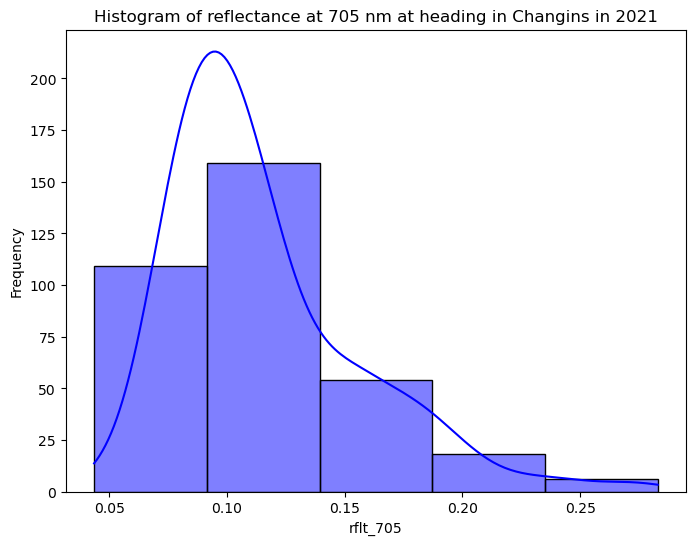

In [15]:
# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(merged_df_heading['rflt_705'], bins=5, kde=True, color='blue')

# Add labels and title
plt.title('Histogram of reflectance at 705 nm at heading in Changins in 2021')
plt.xlabel('rflt_705')
plt.ylabel('Frequency')

# Show the plot
plt.show()

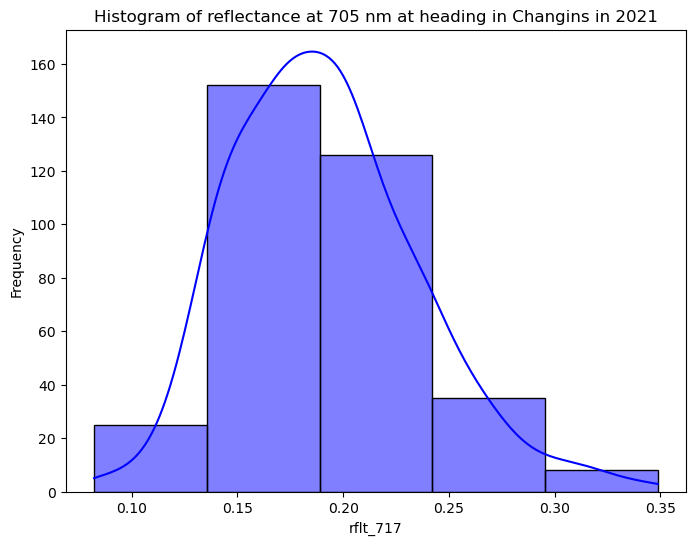

In [16]:
# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(merged_df_heading['rflt_717'], bins=5, kde=True, color='blue')

# Add labels and title
plt.title('Histogram of reflectance at 705 nm at heading in Changins in 2021')
plt.xlabel('rflt_717')
plt.ylabel('Frequency')

# Show the plot
plt.show()

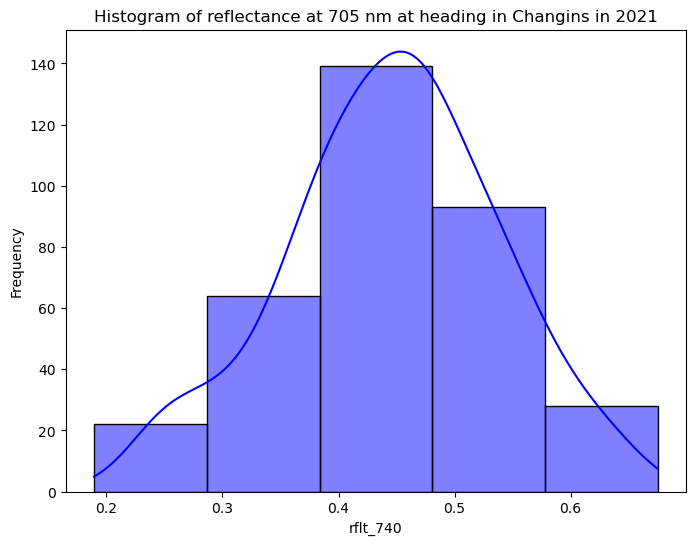

In [17]:
# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(merged_df_heading['rflt_740'], bins=5, kde=True, color='blue')

# Add labels and title
plt.title('Histogram of reflectance at 705 nm at heading in Changins in 2021')
plt.xlabel('rflt_740')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [18]:
merged_df_heading = pd.merge(WL_heading,cat_var,left_index=True, right_index=True, how='inner')
merged_df_heading.head()

,rflt_359,rflt_360,rflt_361,rflt_362,rflt_363,rflt_364,rflt_365,rflt_366,rflt_367,rflt_368,...,rflt_2493,rflt_2494,rflt_2495,rflt_2496,rflt_2497,rflt_2498,rflt_2499,rflt_2500,Variety,NTrt
450,0.018496,0.018435,0.018400,0.018405,0.018403,0.018397,0.018387,0.018440,0.018525,0.018520,...,1.581961,1.396175,1.250916,1.105511,0.872317,0.564462,0.355053,0.268673,CH_Nara,N4
451,0.020588,0.020687,0.020785,0.020865,0.020946,0.021021,0.021073,0.021132,0.021188,0.021193,...,2.709242,2.497226,2.356950,2.202022,1.856865,1.350191,0.806330,0.143074,CH_Claro,N0
452,0.011134,0.011124,0.011104,0.011091,0.011060,0.011027,0.011021,0.011047,0.011089,0.011094,...,0.075658,0.111415,0.137614,0.149119,0.088025,0.000000,0.000000,0.064033,Runal,N1
453,0.014384,0.014365,0.014328,0.014269,0.014220,0.014181,0.014157,0.014164,0.014190,0.014202,...,2.136170,1.965117,1.682155,1.333840,1.004942,0.680806,0.348400,0.000000,Montalbano,N1
454,0.031535,0.031565,0.031607,0.031671,0.031738,0.031801,0.031855,0.031862,0.031833,0.031797,...,2.530151,2.548726,2.548493,2.491856,2.283583,1.939153,1.535481,1.027469,CH_Nara,N1


<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vuill\AppData\Local\Temp\ipykernel_54964\3009187476.py:15: SyntaxWarning: invalid escape sequence '\d'
  df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)


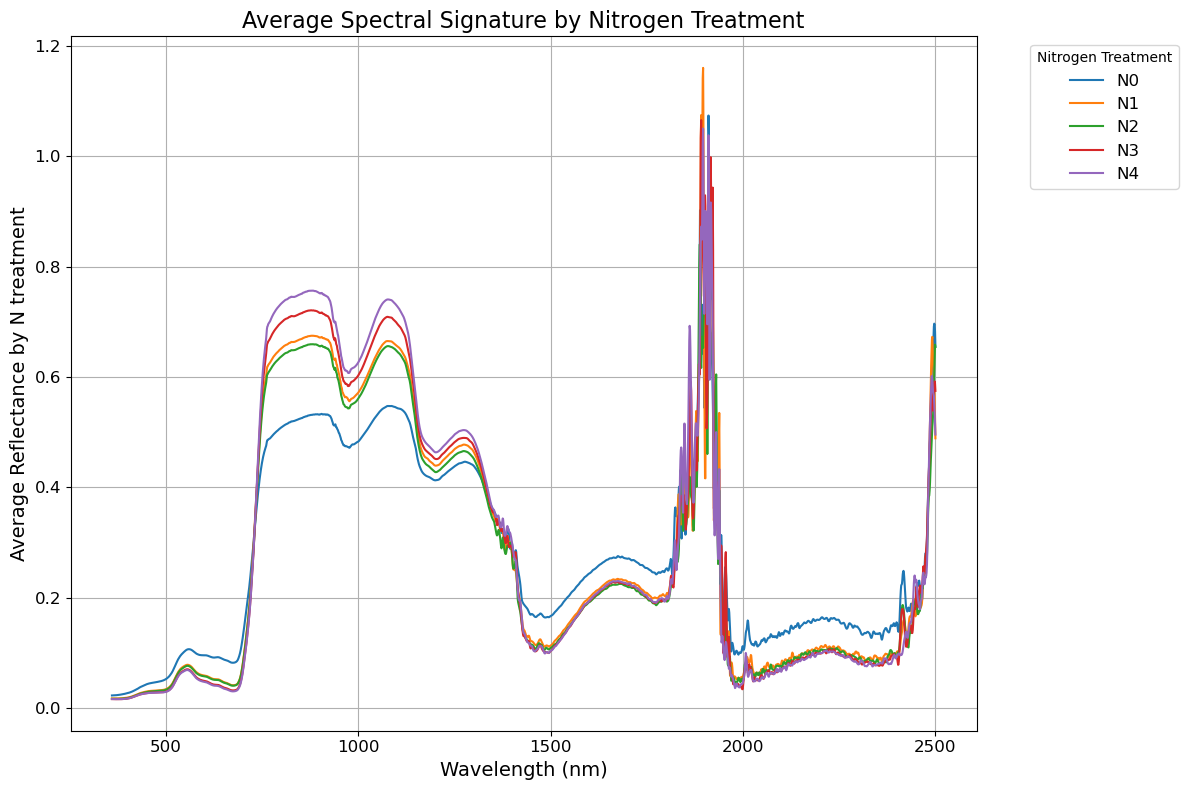

In [19]:
merged_df_heading.drop('Variety', axis=1, inplace=True)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming your dataframe is called df and has columns like ['NTrt', 'rflt_359', 'rflt_360', ..., 'rflt_1000']

# Step 1: Reshape the DataFrame using pd.melt()
df_melted = pd.melt(merged_df_heading, id_vars=['NTrt'], 
                    var_name='Wavelength', value_name='Reflectance')
df_melted = df_melted.dropna(subset=['Reflectance'])
# Step 2: Extract the numeric part of the 'Wavelength' column
df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)


# Step 5: Group by 'NTrt' and 'Wavelength' and calculate the average reflectance
df_average = df_melted.groupby(['NTrt', 'Wavelength'], as_index=False).mean()

# Step 6: Plot the average reflectance data using seaborn's lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_average, x='Wavelength', y='Reflectance', 
             hue='NTrt', markers=True, dashes=False)

# Step 7: Customize the plot
plt.title('Average Spectral Signature by Nitrogen Treatment', fontsize=16)
plt.xlabel('Wavelength (nm)',fontsize=14)
plt.ylabel('Average Reflectance by N treatment',fontsize=14)
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size
plt.grid(True)
plt.legend(title='Nitrogen Treatment', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vuill\AppData\Local\Temp\ipykernel_54964\3697174915.py:19: SyntaxWarning: invalid escape sequence '\d'
  df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)


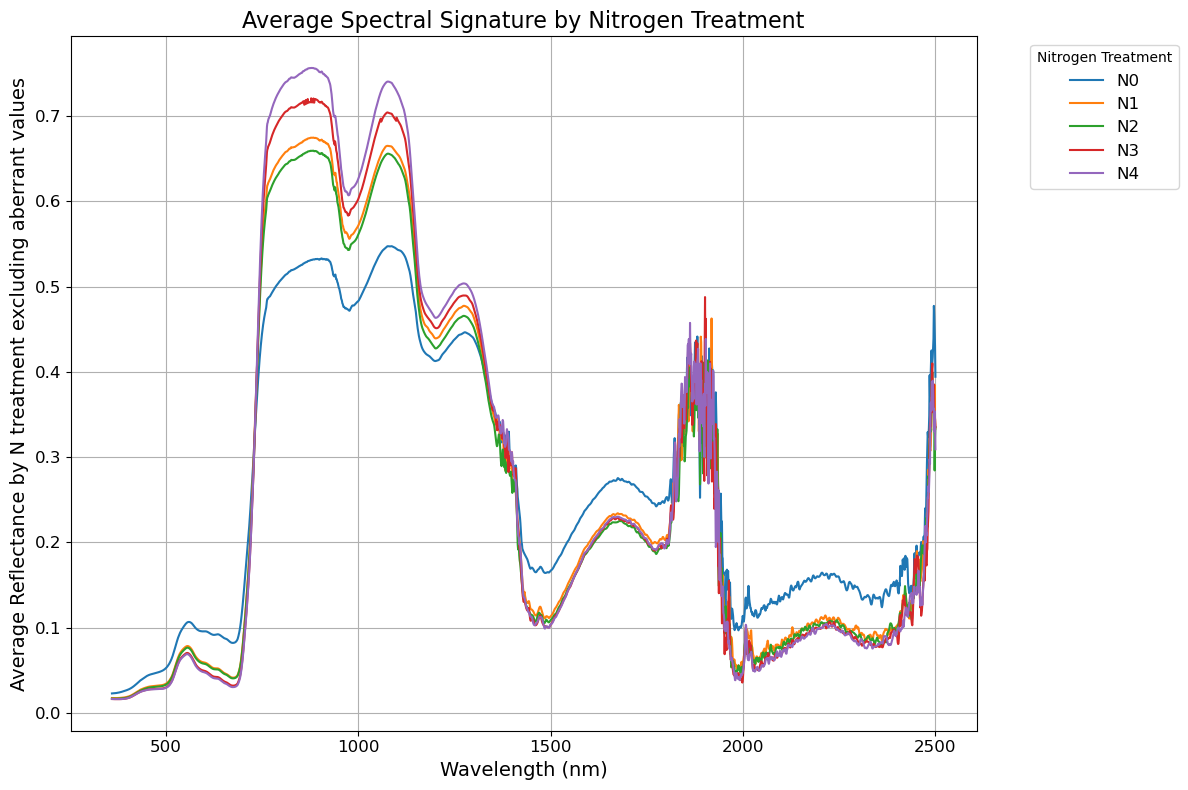

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame structure
# df = pd.DataFrame({
#     'NTrt': ['N1', 'N1', 'N2', 'N2', 'N3', 'N3'],
#     'rflt_359': [0.1, 0.2, 0.3, 1.1, -0.1, 0.5],
#     'rflt_360': [0.15, 0.25, 0.35, 0.95, 0.5, 0.6]
# })

# Assuming your dataframe is called df and has columns like ['NTrt', 'rflt_359', 'rflt_360', ..., 'rflt_1000']

# Step 1: Reshape the DataFrame using pd.melt()
df_melted = pd.melt(merged_df_heading, id_vars=['NTrt'], 
                    var_name='Wavelength', value_name='Reflectance')
df_melted = df_melted.dropna(subset=['Reflectance'])
# Step 2: Extract the numeric part of the 'Wavelength' column
df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)

# Step 4: Filter out reflectance values that are not between 0 and 1
df_filtered = df_melted[(df_melted['Reflectance'] > 0) & (df_melted['Reflectance'] < 1)]

# Step 5: Group by 'NTrt' and 'Wavelength' and calculate the average reflectance
df_average = df_filtered.groupby(['NTrt', 'Wavelength'], as_index=False).mean()

# Step 6: Plot the average reflectance data using seaborn's lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_average, x='Wavelength', y='Reflectance', 
             hue='NTrt', markers=True, dashes=False)

# Step 7: Customize the plot
plt.title('Average Spectral Signature by Nitrogen Treatment', fontsize=16)
plt.xlabel('Wavelength (nm)',fontsize=14)
plt.ylabel('Average Reflectance by N treatment excluding aberrant values',fontsize=14)
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size
plt.grid(True)
plt.legend(title='Nitrogen Treatment', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=12) 
# Display the plot
plt.tight_layout()
plt.show()


In [21]:
merged_df_heading = pd.merge(WL_heading,cat_var,left_index=True, right_index=True, how='inner')
merged_df_heading.head()

merged_df_heading.drop('NTrt', axis=1, inplace=True)


In [22]:
cat_var_date= df_heading[['Variety','NTrt','date','site','Year']]
cat_var_date

,Variety,NTrt,date,site,Year
450,CH_Nara,N4,20210526,CH,2021
451,CH_Claro,N0,20210526,CH,2021
452,Runal,N1,20210526,CH,2021
453,Montalbano,N1,20210526,CH,2021
454,CH_Nara,N1,20210526,CH,2021
...,...,...,...,...,...
2545,CH_Claro,N2,20220602,RE,2022
2546,Runal,N3,20220602,RE,2022
2547,Montalbano,N4,20220602,RE,2022
2548,CH_Camedo,N0,20220602,RE,2022


<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vuill\AppData\Local\Temp\ipykernel_54964\571437308.py:19: SyntaxWarning: invalid escape sequence '\d'
  df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)


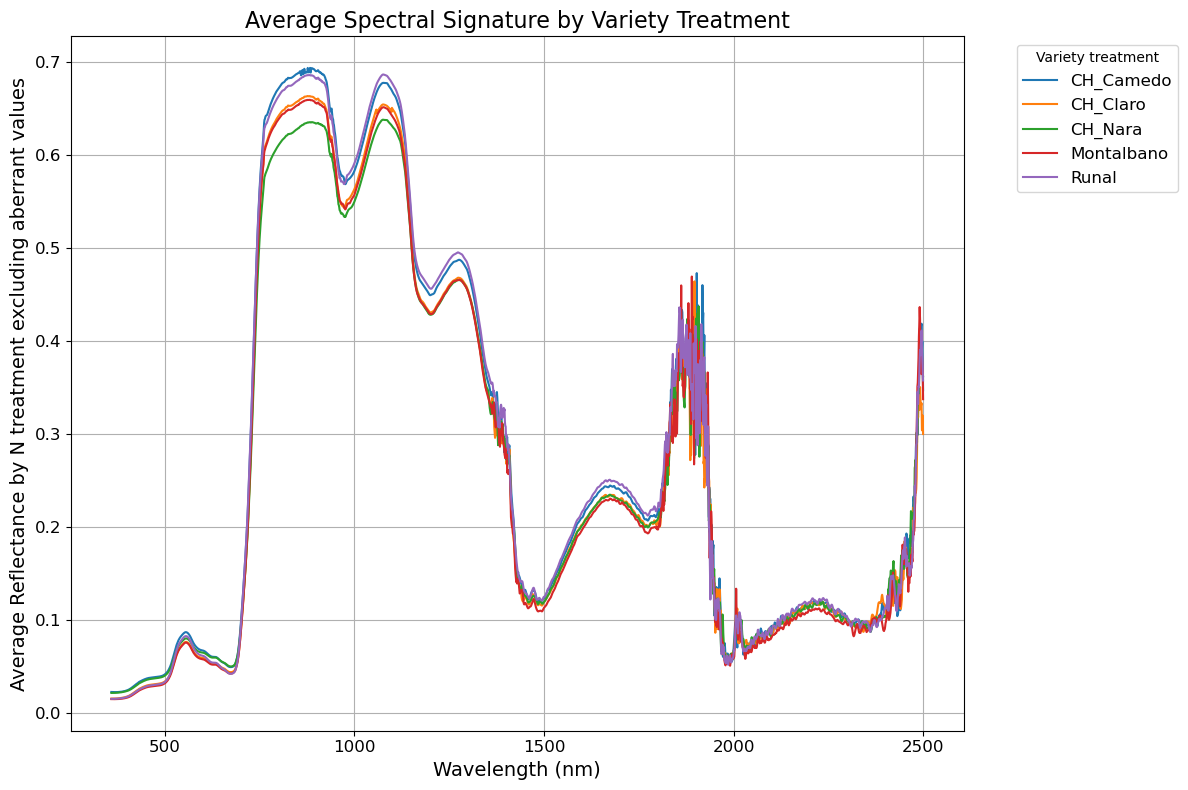

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame structure
# df = pd.DataFrame({
#     'NTrt': ['N1', 'N1', 'N2', 'N2', 'N3', 'N3'],
#     'rflt_359': [0.1, 0.2, 0.3, 1.1, -0.1, 0.5],
#     'rflt_360': [0.15, 0.25, 0.35, 0.95, 0.5, 0.6]
# })

# Assuming your dataframe is called df and has columns like ['NTrt', 'rflt_359', 'rflt_360', ..., 'rflt_1000']

# Step 1: Reshape the DataFrame using pd.melt()
df_melted = pd.melt(merged_df_heading, id_vars=['Variety'], 
                    var_name='Wavelength', value_name='Reflectance')
df_melted = df_melted.dropna(subset=['Reflectance'])
# Step 2: Extract the numeric part of the 'Wavelength' column
df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)

# Step 4: Filter out reflectance values that are not between 0 and 1
df_filtered = df_melted[(df_melted['Reflectance'] > 0) & (df_melted['Reflectance'] < 1)]

# Step 5: Group by 'NTrt' and 'Wavelength' and calculate the average reflectance
df_average = df_filtered.groupby(['Variety', 'Wavelength'], as_index=False).mean()

# Step 6: Plot the average reflectance data using seaborn's lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_average, x='Wavelength', y='Reflectance', 
             hue='Variety', markers=True, dashes=False)

# Step 7: Customize the plot
plt.title('Average Spectral Signature by Variety Treatment', fontsize=16)
plt.xlabel('Wavelength (nm)',fontsize=14)
plt.ylabel('Average Reflectance by N treatment excluding aberrant values',fontsize=14)
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size
plt.grid(True)
plt.legend(title='Variety treatment', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=12) 
# Display the plot
plt.tight_layout()
plt.show()


In [24]:
WL_heading

,rflt_359,rflt_360,rflt_361,rflt_362,rflt_363,rflt_364,rflt_365,rflt_366,rflt_367,rflt_368,...,rflt_2491,rflt_2492,rflt_2493,rflt_2494,rflt_2495,rflt_2496,rflt_2497,rflt_2498,rflt_2499,rflt_2500
450,0.018496,0.018435,0.018400,0.018405,0.018403,0.018397,0.018387,0.018440,0.018525,0.018520,...,1.899679,1.756079,1.581961,1.396175,1.250916,1.105511,0.872317,0.564462,0.355053,0.268673
451,0.020588,0.020687,0.020785,0.020865,0.020946,0.021021,0.021073,0.021132,0.021188,0.021193,...,3.005015,2.894421,2.709242,2.497226,2.356950,2.202022,1.856865,1.350191,0.806330,0.143074
452,0.011134,0.011124,0.011104,0.011091,0.011060,0.011027,0.011021,0.011047,0.011089,0.011094,...,0.076289,0.049697,0.075658,0.111415,0.137614,0.149119,0.088025,0.000000,0.000000,0.064033
453,0.014384,0.014365,0.014328,0.014269,0.014220,0.014181,0.014157,0.014164,0.014190,0.014202,...,2.303173,2.242716,2.136170,1.965117,1.682155,1.333840,1.004942,0.680806,0.348400,0.000000
454,0.031535,0.031565,0.031607,0.031671,0.031738,0.031801,0.031855,0.031862,0.031833,0.031797,...,2.341788,2.459479,2.530151,2.548726,2.548493,2.491856,2.283583,1.939153,1.535481,1.027469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,0.019242,0.019225,0.019217,0.019220,0.019220,0.019213,0.019193,0.019167,0.019142,0.019142,...,0.202242,0.171438,0.140778,0.117659,0.116886,0.124532,0.113113,0.087211,0.060568,0.029221
2546,0.019873,0.019854,0.019848,0.019870,0.019876,0.019877,0.019889,0.019899,0.019909,0.019929,...,0.431190,0.438568,0.466604,0.494713,0.509855,0.514796,0.506112,0.484788,0.415167,0.271798
2547,0.017100,0.017062,0.017031,0.016999,0.016990,0.016984,0.016945,0.016906,0.016873,0.016852,...,0.458072,0.450254,0.420843,0.384846,0.357021,0.332301,0.310606,0.291808,0.287770,0.306802
2548,0.027034,0.027032,0.027038,0.027049,0.027046,0.027034,0.027017,0.027002,0.026989,0.026977,...,0.731620,0.773502,0.790729,0.791360,0.784193,0.764141,0.722465,0.660524,0.590668,0.511850


In [25]:
WL_heading_Clean = WL_heading.loc[:, (WL_heading >= 0).all() & (WL_heading < 1).all()]

In [26]:
WL_heading_Clean

,rflt_359,rflt_360,rflt_361,rflt_362,rflt_363,rflt_364,rflt_365,rflt_366,rflt_367,rflt_368,...,rflt_2397,rflt_2398,rflt_2399,rflt_2400,rflt_2401,rflt_2402,rflt_2403,rflt_2404,rflt_2405,rflt_2406
450,0.018496,0.018435,0.018400,0.018405,0.018403,0.018397,0.018387,0.018440,0.018525,0.018520,...,0.034948,0.034501,0.031871,0.024511,0.015071,0.004464,0.000000,0.000000,0.019550,0.044989
451,0.020588,0.020687,0.020785,0.020865,0.020946,0.021021,0.021073,0.021132,0.021188,0.021193,...,0.203688,0.194410,0.183538,0.176407,0.170196,0.165126,0.161054,0.156000,0.144307,0.145424
452,0.011134,0.011124,0.011104,0.011091,0.011060,0.011027,0.011021,0.011047,0.011089,0.011094,...,0.020158,0.028507,0.036386,0.038861,0.037701,0.028832,0.014188,0.010170,0.023937,0.032951
453,0.014384,0.014365,0.014328,0.014269,0.014220,0.014181,0.014157,0.014164,0.014190,0.014202,...,0.106759,0.122822,0.140503,0.165561,0.188879,0.196184,0.191652,0.178795,0.151900,0.131347
454,0.031535,0.031565,0.031607,0.031671,0.031738,0.031801,0.031855,0.031862,0.031833,0.031797,...,0.124847,0.127968,0.129268,0.125751,0.118896,0.105622,0.087790,0.086166,0.106193,0.131990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,0.019242,0.019225,0.019217,0.019220,0.019220,0.019213,0.019193,0.019167,0.019142,0.019142,...,0.047016,0.045436,0.044270,0.044184,0.044723,0.045803,0.047372,0.048214,0.048557,0.047425
2546,0.019873,0.019854,0.019848,0.019870,0.019876,0.019877,0.019889,0.019899,0.019909,0.019929,...,0.046027,0.045030,0.044660,0.045637,0.046996,0.047256,0.046851,0.046643,0.046663,0.046926
2547,0.017100,0.017062,0.017031,0.016999,0.016990,0.016984,0.016945,0.016906,0.016873,0.016852,...,0.042390,0.041355,0.040736,0.041380,0.042629,0.044108,0.045861,0.046995,0.047523,0.047259
2548,0.027034,0.027032,0.027038,0.027049,0.027046,0.027034,0.027017,0.027002,0.026989,0.026977,...,0.045865,0.044340,0.042791,0.041227,0.039767,0.038799,0.038178,0.037160,0.035756,0.033815


In [36]:
df_heading_withoutRowsAberrant1100

,ID,CropStage,rflt_359,rflt_360,rflt_361,rflt_362,rflt_363,rflt_364,rflt_365,rflt_366,...,MeanMSR_Re717_BHPH,MeanLAIBHHPH,MeanLAIBHPH,Date_R_NDRE717,R_NDRE717,Date_R_NDRE717_BHHPH,R_NDRE717_BHHPH,YieldGrain0PercKgM2,HIgrain_g,Histraw_g
450,1,Heading,0.018496,0.018435,0.018400,0.018405,0.018403,0.018397,0.018387,0.018440,...,1.100238,3.367222,3.136667,20210527,0.564690,20210518&27&0603,0.562016,0.708323,88.5,86.3
451,2,Heading,0.020588,0.020687,0.020785,0.020865,0.020946,0.021021,0.021073,0.021132,...,0.416664,1.685556,1.465000,20210527,0.240186,20210518&27&0603,0.257691,0.319911,72.2,123.9
452,3,Heading,0.011134,0.011124,0.011104,0.011091,0.011060,0.011027,0.011021,0.011047,...,0.919589,2.987222,3.137500,20210527,0.503334,20210518&27&0603,0.502541,0.665302,61.4,70.3
453,4,Heading,0.014384,0.014365,0.014328,0.014269,0.014220,0.014181,0.014157,0.014164,...,0.939131,3.116111,2.858333,20210527,0.526015,20210518&27&0603,0.522559,0.586376,55.6,81.0
454,5,Heading,0.031535,0.031565,0.031607,0.031671,0.031738,0.031801,0.031855,0.031862,...,0.882945,2.810556,2.635000,20210527,0.490496,20210518&27&0603,0.489624,NaN,64.3,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,71,Heading,0.019242,0.019225,0.019217,0.019220,0.019220,0.019213,0.019193,0.019167,...,1.743544,6.042778,6.188333,20220602,0.647410,20220506&0602&15,0.625584,0.779080,NaN,NaN
2546,72,Heading,0.019873,0.019854,0.019848,0.019870,0.019876,0.019877,0.019889,0.019899,...,1.628855,7.557778,7.463333,20220602,0.637141,20220506&0602&15,0.621880,0.766578,NaN,NaN
2547,73,Heading,0.017100,0.017062,0.017031,0.016999,0.016990,0.016984,0.016945,0.016906,...,1.849857,6.806111,6.851667,20220602,0.666501,20220506&0602&15,0.659692,0.806605,NaN,NaN
2548,74,Heading,0.027034,0.027032,0.027038,0.027049,0.027046,0.027034,0.027017,0.027002,...,1.374327,3.890556,3.947500,20220602,0.552042,20220506&0602&15,0.534020,0.656806,NaN,NaN


In [52]:
WL_heading_Clean=WL_heading_Clean.reset_index(drop=True)

In [53]:
print(WL_heading_Clean.index)

RangeIndex(start=0, stop=346, step=1)


In [54]:
df_heading_withoutRowsAberrant1100=df_heading_withoutRowsAberrant1100.reset_index(drop=True)

In [55]:
print(df_heading_withoutRowsAberrant1100.index)

RangeIndex(start=0, stop=346, step=1)


In [61]:
df_heading_withoutRowsAberrant1100_agro_var=df_heading_withoutRowsAberrant1100.iloc[:,2144:]
df_heading_withoutRowsAberrant1100_agro_var

,date,site,Year,Experiment,row,col,Exp,Location,Town,Variety,...,MeanMSR_Re717_BHPH,MeanLAIBHHPH,MeanLAIBHPH,Date_R_NDRE717,R_NDRE717,Date_R_NDRE717_BHHPH,R_NDRE717_BHHPH,YieldGrain0PercKgM2,HIgrain_g,Histraw_g
0,20210526,CH,2021,WheatAdvisor_exact,1,1,WA,1260,Changins,CH_Nara,...,1.100238,3.367222,3.136667,20210527,0.564690,20210518&27&0603,0.562016,0.708323,88.5,86.3
1,20210526,CH,2021,WheatAdvisor_exact,2,1,WA,1260,Changins,CH_Claro,...,0.416664,1.685556,1.465000,20210527,0.240186,20210518&27&0603,0.257691,0.319911,72.2,123.9
2,20210526,CH,2021,WheatAdvisor_exact,3,1,WA,1260,Changins,Runal,...,0.919589,2.987222,3.137500,20210527,0.503334,20210518&27&0603,0.502541,0.665302,61.4,70.3
3,20210526,CH,2021,WheatAdvisor_exact,4,1,WA,1260,Changins,Montalbano,...,0.939131,3.116111,2.858333,20210527,0.526015,20210518&27&0603,0.522559,0.586376,55.6,81.0
4,20210526,CH,2021,WheatAdvisor_exact,5,1,WA,1260,Changins,CH_Nara,...,0.882945,2.810556,2.635000,20210527,0.490496,20210518&27&0603,0.489624,NaN,64.3,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,20220602,RE,2022,WheatAdvisor_exact,1,19,WA,8046,Reckenholz,CH_Claro,...,1.743544,6.042778,6.188333,20220602,0.647410,20220506&0602&15,0.625584,0.779080,NaN,NaN
342,20220602,RE,2022,WheatAdvisor_exact,3,19,WA,8046,Reckenholz,Runal,...,1.628855,7.557778,7.463333,20220602,0.637141,20220506&0602&15,0.621880,0.766578,NaN,NaN
343,20220602,RE,2022,WheatAdvisor_exact,5,19,WA,8046,Reckenholz,Montalbano,...,1.849857,6.806111,6.851667,20220602,0.666501,20220506&0602&15,0.659692,0.806605,NaN,NaN
344,20220602,RE,2022,WheatAdvisor_exact,7,19,WA,8046,Reckenholz,CH_Camedo,...,1.374327,3.890556,3.947500,20220602,0.552042,20220506&0602&15,0.534020,0.656806,NaN,NaN


In [62]:
# Merge on index
Final_merged_df_HS = pd.merge(WL_heading_Clean, df_heading_withoutRowsAberrant1100_agro_var, left_index=True, right_index=True)

# Drop duplicate columns by filtering out columns with the '_dup' suffix
Final_merged_df_HS

,rflt_359,rflt_360,rflt_361,rflt_362,rflt_363,rflt_364,rflt_365,rflt_366,rflt_367,rflt_368,...,MeanMSR_Re717_BHPH,MeanLAIBHHPH,MeanLAIBHPH,Date_R_NDRE717,R_NDRE717,Date_R_NDRE717_BHHPH,R_NDRE717_BHHPH,YieldGrain0PercKgM2,HIgrain_g,Histraw_g
0,0.018496,0.018435,0.018400,0.018405,0.018403,0.018397,0.018387,0.018440,0.018525,0.018520,...,1.100238,3.367222,3.136667,20210527,0.564690,20210518&27&0603,0.562016,0.708323,88.5,86.3
1,0.020588,0.020687,0.020785,0.020865,0.020946,0.021021,0.021073,0.021132,0.021188,0.021193,...,0.416664,1.685556,1.465000,20210527,0.240186,20210518&27&0603,0.257691,0.319911,72.2,123.9
2,0.011134,0.011124,0.011104,0.011091,0.011060,0.011027,0.011021,0.011047,0.011089,0.011094,...,0.919589,2.987222,3.137500,20210527,0.503334,20210518&27&0603,0.502541,0.665302,61.4,70.3
3,0.014384,0.014365,0.014328,0.014269,0.014220,0.014181,0.014157,0.014164,0.014190,0.014202,...,0.939131,3.116111,2.858333,20210527,0.526015,20210518&27&0603,0.522559,0.586376,55.6,81.0
4,0.031535,0.031565,0.031607,0.031671,0.031738,0.031801,0.031855,0.031862,0.031833,0.031797,...,0.882945,2.810556,2.635000,20210527,0.490496,20210518&27&0603,0.489624,NaN,64.3,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.019242,0.019225,0.019217,0.019220,0.019220,0.019213,0.019193,0.019167,0.019142,0.019142,...,1.743544,6.042778,6.188333,20220602,0.647410,20220506&0602&15,0.625584,0.779080,NaN,NaN
342,0.019873,0.019854,0.019848,0.019870,0.019876,0.019877,0.019889,0.019899,0.019909,0.019929,...,1.628855,7.557778,7.463333,20220602,0.637141,20220506&0602&15,0.621880,0.766578,NaN,NaN
343,0.017100,0.017062,0.017031,0.016999,0.016990,0.016984,0.016945,0.016906,0.016873,0.016852,...,1.849857,6.806111,6.851667,20220602,0.666501,20220506&0602&15,0.659692,0.806605,NaN,NaN
344,0.027034,0.027032,0.027038,0.027049,0.027046,0.027034,0.027017,0.027002,0.026989,0.026977,...,1.374327,3.890556,3.947500,20220602,0.552042,20220506&0602&15,0.534020,0.656806,NaN,NaN


In [63]:
Final_merged_df_HS.to_csv('Final_merged_df_HS.csv', index=False)

In [27]:
WL_heading_Clean.to_csv('WL_heading_Clean.csv', index=False)

In [28]:
cat_var_NTrt= df_heading[['NTrt']]
cat_var_NTrt

,NTrt
450,N4
451,N0
452,N1
453,N1
454,N1
...,...
2545,N2
2546,N3
2547,N4
2548,N0


In [29]:
merged_df_heading_Clean = pd.merge(WL_heading_Clean ,cat_var_NTrt,left_index=True, right_index=True, how='inner')

<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vuill\AppData\Local\Temp\ipykernel_54964\1371303359.py:19: SyntaxWarning: invalid escape sequence '\d'
  df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)


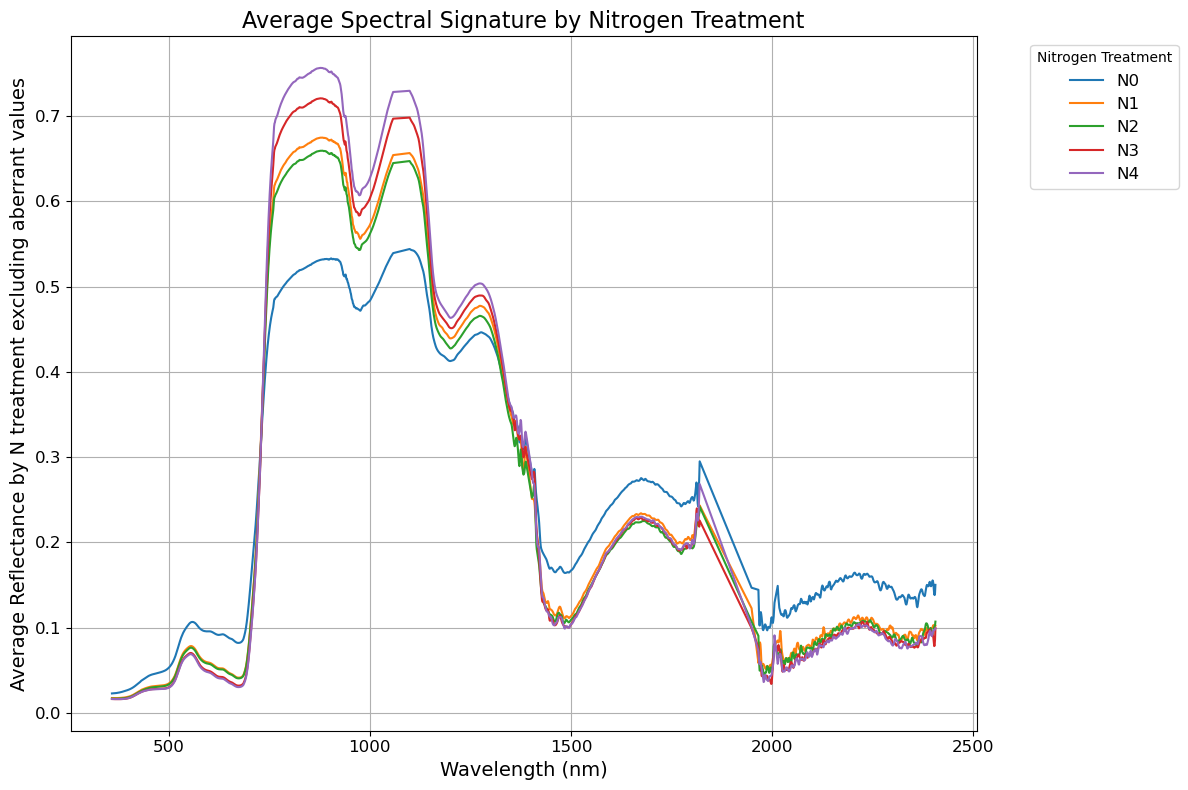

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame structure
# df = pd.DataFrame({
#     'NTrt': ['N1', 'N1', 'N2', 'N2', 'N3', 'N3'],
#     'rflt_359': [0.1, 0.2, 0.3, 1.1, -0.1, 0.5],
#     'rflt_360': [0.15, 0.25, 0.35, 0.95, 0.5, 0.6]
# })

# Assuming your dataframe is called df and has columns like ['NTrt', 'rflt_359', 'rflt_360', ..., 'rflt_1000']

# Step 1: Reshape the DataFrame using pd.melt()
df_melted = pd.melt(merged_df_heading_Clean, id_vars=['NTrt'], 
                    var_name='Wavelength', value_name='Reflectance')
df_melted = df_melted.dropna(subset=['Reflectance'])
# Step 2: Extract the numeric part of the 'Wavelength' column
df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)

# Step 5: Group by 'NTrt' and 'Wavelength' and calculate the average reflectance
df_average = df_melted.groupby(['NTrt', 'Wavelength'], as_index=False).mean()

# Step 6: Plot the average reflectance data using seaborn's lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_average, x='Wavelength', y='Reflectance', 
             hue='NTrt', markers=True, dashes=False)

# Step 7: Customize the plot
plt.title('Average Spectral Signature by Nitrogen Treatment', fontsize=16)
plt.xlabel('Wavelength (nm)',fontsize=14)
plt.ylabel('Average Reflectance by N treatment excluding aberrant values',fontsize=14)
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size
plt.grid(True)
plt.legend(title='Nitrogen Treatment', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=12) 
# Display the plot
plt.tight_layout()
plt.show()

In [31]:
merged_df_heading_Clean.drop('NTrt', axis=1, inplace=True)

merged_df_heading_Clean.to_csv('WLAfterAberrantValuesRemoving.csv', index=False)

In [32]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.mixture import GaussianMixture

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from matplotlib import  pyplot as plt
import numpy as np
import pandas as pd
from imageio import imread
from time import time as timer
import os
import tarfile

import tensorflow as tf

%matplotlib inline
import umap
from matplotlib import animation
from IPython.display import HTML

from scipy.stats import entropy
from sklearn.preprocessing import StandardScaler

In [33]:
WL_heading_Clean = pd.read_csv("WLAfterAberrantValuesRemoving.csv",  sep=",")
WL_heading_Clean

,rflt_359,rflt_360,rflt_361,rflt_362,rflt_363,rflt_364,rflt_365,rflt_366,rflt_367,rflt_368,...,rflt_2397,rflt_2398,rflt_2399,rflt_2400,rflt_2401,rflt_2402,rflt_2403,rflt_2404,rflt_2405,rflt_2406
0,0.018496,0.018435,0.018400,0.018405,0.018403,0.018397,0.018387,0.018440,0.018525,0.018520,...,0.034948,0.034501,0.031871,0.024511,0.015071,0.004464,0.000000,0.000000,0.019550,0.044989
1,0.020588,0.020687,0.020785,0.020865,0.020946,0.021021,0.021073,0.021132,0.021188,0.021193,...,0.203688,0.194410,0.183538,0.176407,0.170196,0.165126,0.161054,0.156000,0.144307,0.145424
2,0.011134,0.011124,0.011104,0.011091,0.011060,0.011027,0.011021,0.011047,0.011089,0.011094,...,0.020158,0.028507,0.036386,0.038861,0.037701,0.028832,0.014188,0.010170,0.023937,0.032951
3,0.014384,0.014365,0.014328,0.014269,0.014220,0.014181,0.014157,0.014164,0.014190,0.014202,...,0.106759,0.122822,0.140503,0.165561,0.188879,0.196184,0.191652,0.178795,0.151900,0.131347
4,0.031535,0.031565,0.031607,0.031671,0.031738,0.031801,0.031855,0.031862,0.031833,0.031797,...,0.124847,0.127968,0.129268,0.125751,0.118896,0.105622,0.087790,0.086166,0.106193,0.131990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.019242,0.019225,0.019217,0.019220,0.019220,0.019213,0.019193,0.019167,0.019142,0.019142,...,0.047016,0.045436,0.044270,0.044184,0.044723,0.045803,0.047372,0.048214,0.048557,0.047425
342,0.019873,0.019854,0.019848,0.019870,0.019876,0.019877,0.019889,0.019899,0.019909,0.019929,...,0.046027,0.045030,0.044660,0.045637,0.046996,0.047256,0.046851,0.046643,0.046663,0.046926
343,0.017100,0.017062,0.017031,0.016999,0.016990,0.016984,0.016945,0.016906,0.016873,0.016852,...,0.042390,0.041355,0.040736,0.041380,0.042629,0.044108,0.045861,0.046995,0.047523,0.047259
344,0.027034,0.027032,0.027038,0.027049,0.027046,0.027034,0.027017,0.027002,0.026989,0.026977,...,0.045865,0.044340,0.042791,0.041227,0.039767,0.038799,0.038178,0.037160,0.035756,0.033815


In [34]:
df_heading_withoutRowsAberrant1100.columns

Index(['ID', 'CropStage', 'rflt_359', 'rflt_360', 'rflt_361', 'rflt_362',
       'rflt_363', 'rflt_364', 'rflt_365', 'rflt_366',
       ...
       'MeanMSR_Re717_BHPH', 'MeanLAIBHHPH', 'MeanLAIBHPH', 'Date_R_NDRE717',
       'R_NDRE717', 'Date_R_NDRE717_BHHPH', 'R_NDRE717_BHHPH',
       'YieldGrain0PercKgM2', 'HIgrain_g', 'Histraw_g'],
      dtype='object', length=2285)

In [35]:
cat_var_Whole= df_heading_withoutRowsAberrant1100[['Variety','NTrt','site','Year']]
cat_var_Whole

,Variety,NTrt,site,Year
450,CH_Nara,N4,CH,2021
451,CH_Claro,N0,CH,2021
452,Runal,N1,CH,2021
453,Montalbano,N1,CH,2021
454,CH_Nara,N1,CH,2021
...,...,...,...,...
2545,CH_Claro,N2,RE,2022
2546,Runal,N3,RE,2022
2547,Montalbano,N4,RE,2022
2548,CH_Camedo,N0,RE,2022


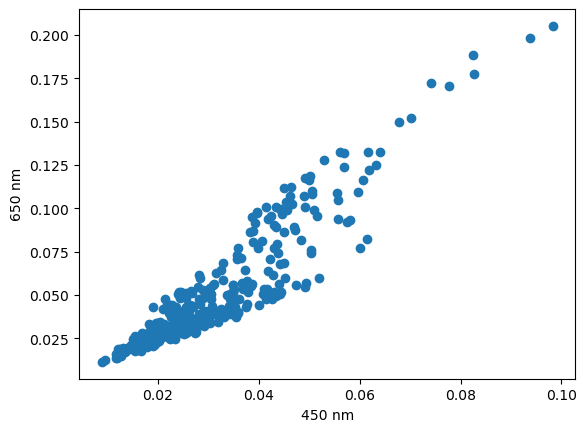

In [38]:
plt.plot(WL_heading_Clean['rflt_450'],WL_heading_Clean['rflt_650'],'o')
plt.xlabel('450 nm')
plt.ylabel('650 nm')
plt.show()

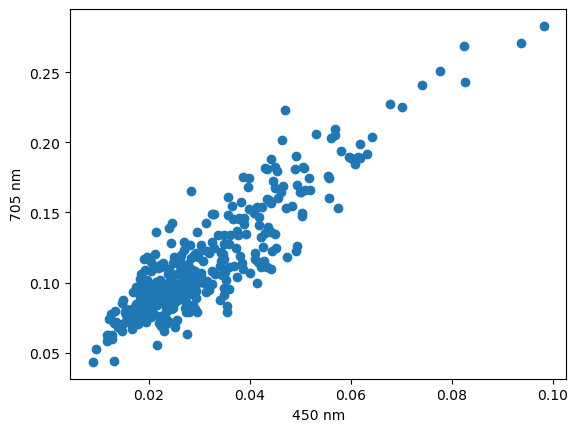

In [39]:
plt.plot(WL_heading_Clean['rflt_450'],WL_heading_Clean['rflt_705'],'o')
plt.xlabel('450 nm')
plt.ylabel('705 nm')
plt.show()

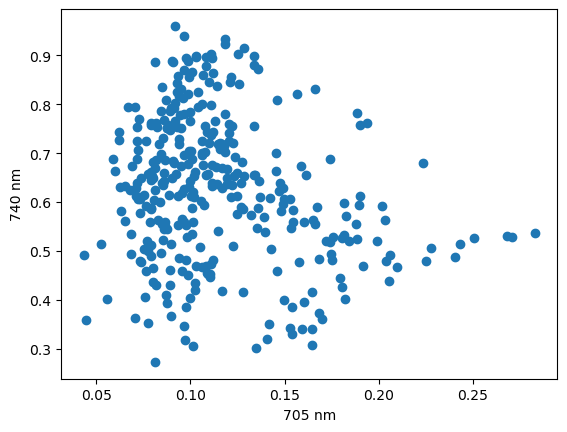

In [40]:
plt.plot(WL_heading_Clean['rflt_705'],WL_heading_Clean['rflt_1040'],'o')
plt.xlabel('705 nm')
plt.ylabel('740 nm')
plt.show()

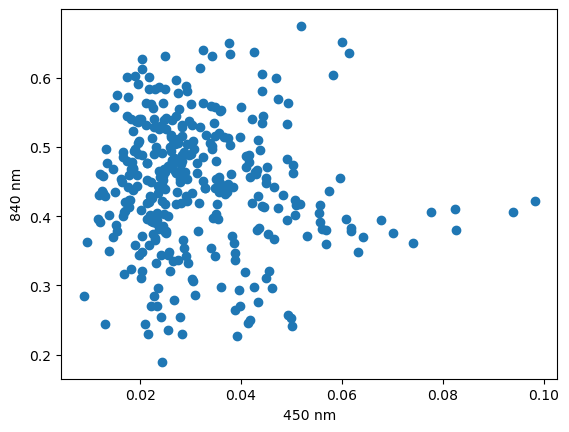

In [41]:
plt.plot(WL_heading_Clean['rflt_450'],WL_heading_Clean['rflt_740'],'o')
plt.xlabel('450 nm')
plt.ylabel('840 nm')
plt.show()

In [42]:
array_2d = WL_heading_Clean[['rflt_450', 'rflt_740']].values

In [43]:
clusterer = KMeans(n_clusters=3, random_state=10, n_init=10)

C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


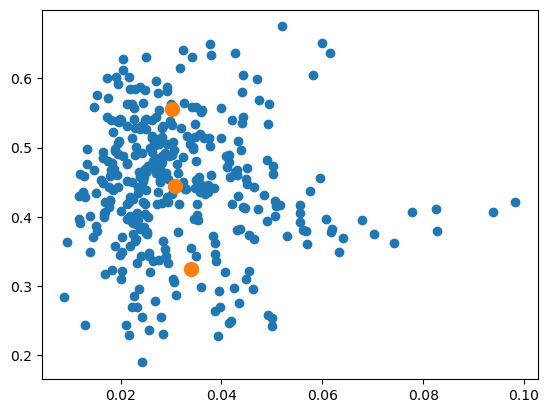

In [44]:
clusterer.fit(array_2d)
plt.plot(WL_heading_Clean['rflt_450'],WL_heading_Clean['rflt_740'],'o')
plt.plot(clusterer.cluster_centers_[:,0],clusterer.cluster_centers_[:,1],'o',markersize=10)
plt.show()

In [45]:
clusterer.cluster_centers_[:,:]

array([[0.0308557 , 0.44464328],
       [0.03025475, 0.5558252 ],
       [0.03395291, 0.32403355]])

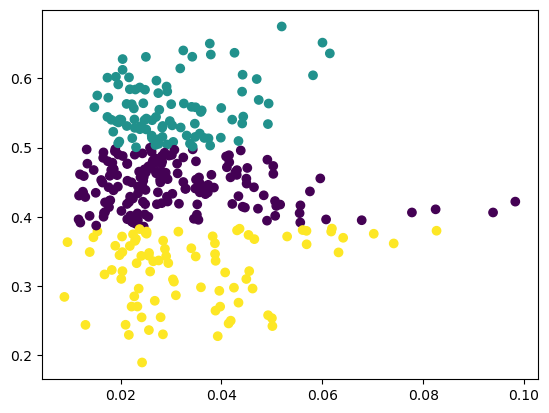

In [46]:
cluster_labels=clusterer.predict(array_2d)
plt.scatter(array_2d[:,0],array_2d[:,1],c=cluster_labels)
plt.show()

C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


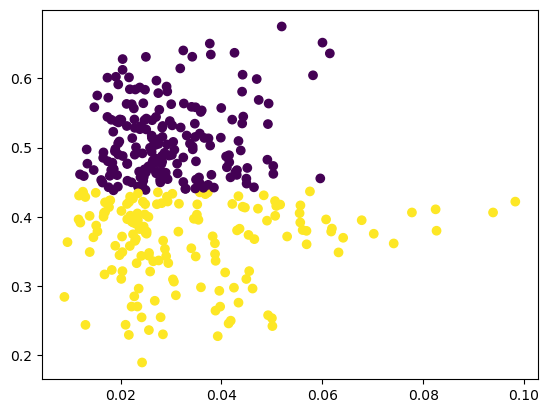

C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


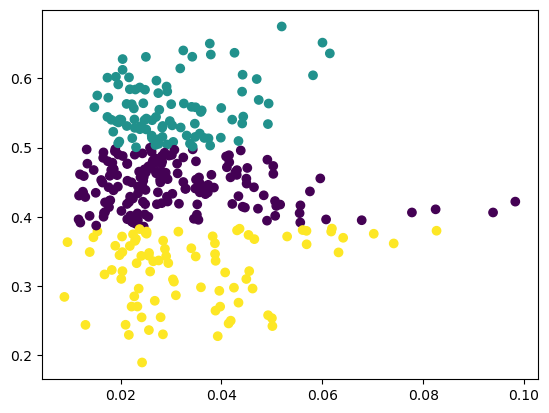

C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


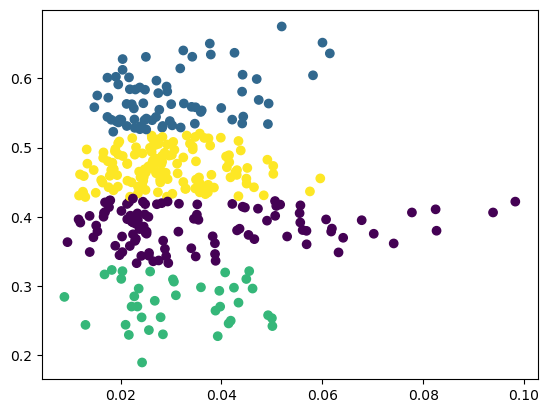

C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


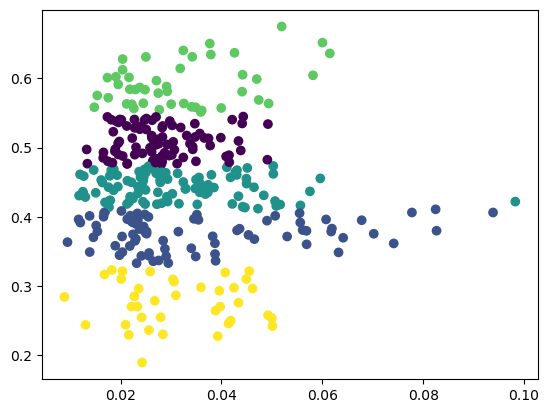

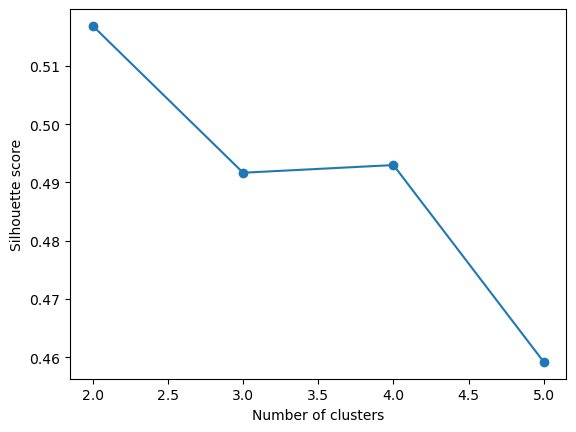

In [47]:
sil=[]

for iclust in range(2,6):
    clusterer = KMeans(n_clusters=iclust, random_state=10, n_init=10)
    cluster_labels = clusterer.fit_predict(array_2d)
    score=silhouette_score(array_2d,cluster_labels)
    sil.append(score)
    plt.scatter(array_2d[:,0],array_2d[:,1],c=cluster_labels)
    plt.show()

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.plot(np.arange(len(sil))+2, sil,'-o')
plt.show()

In [48]:
# Convert the entire DataFrame to a NumPy ndarray
array_ndarray = WL_heading_Clean.values

In [49]:
array_ndarray

array([[0.018496, 0.018435, 0.0184  , ..., 0.      , 0.01955 , 0.044989],
       [0.020588, 0.020687, 0.020785, ..., 0.156   , 0.144307, 0.145424],
       [0.011134, 0.011124, 0.011104, ..., 0.01017 , 0.023937, 0.032951],
       ...,
       [0.0171  , 0.017062, 0.017031, ..., 0.046995, 0.047523, 0.047259],
       [0.027034, 0.027032, 0.027038, ..., 0.03716 , 0.035756, 0.033815],
       [0.019453, 0.019417, 0.019388, ..., 0.03328 , 0.030822, 0.028437]])

Number of clusters considered:  2


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of clusters considered:  3


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of clusters considered:  4


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of clusters considered:  5


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of clusters considered:  6


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of clusters considered:  7


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of clusters considered:  8


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of clusters considered:  9


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of clusters considered:  10


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of clusters considered:  11


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of clusters considered:  12


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of clusters considered:  13


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of clusters considered:  14


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\vuill\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


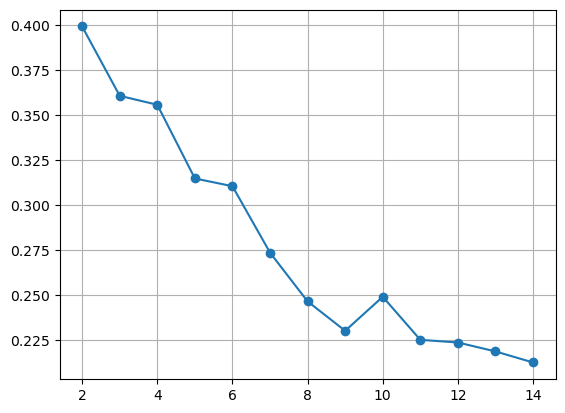

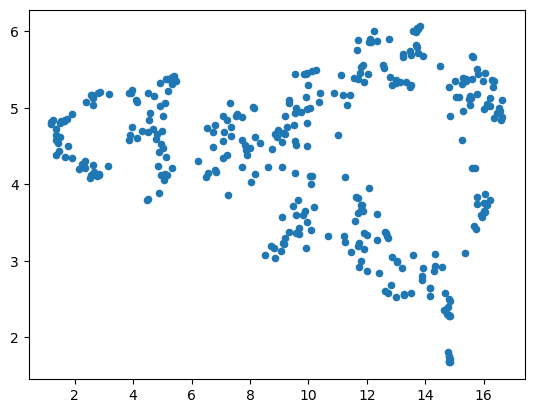

In [50]:
### In this exercise you are given the dataset points, consisting of high-dimensional data. It was built taking random 
#samples from a number k of multimensional gaussians. The data is therefore made of k clusters but, being 
#very high dimensional, you cannot visualize it. Your task it too use K-means combined with the Silouhette 
#score to find the number of k.

plt.figure()
scores=[]
for itrial in range(2,15):
    print('Number of clusters considered: ',itrial)
    clusterer = KMeans(n_clusters=itrial, random_state=10)
    cluster_labels = clusterer.fit_predict(array_ndarray)
    score=silhouette_score(array_ndarray,cluster_labels)
    scores.append(score)

# 3. Plot the Silhouette scores as a function ok k? What is the number of clusters ?
plt.grid()
plt.plot(np.arange(len(scores))+2,np.array(scores),'-o')

# 4. Optional. Check the result that you found via umap. 
plt.figure()
umap_model = umap.UMAP(random_state=1711)
umap_gs = umap_model.fit_transform(array_ndarray)
plt.scatter(umap_gs[:, 0], umap_gs [:, 1], s=20)

In [51]:
import umap

C:\Users\vuill\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


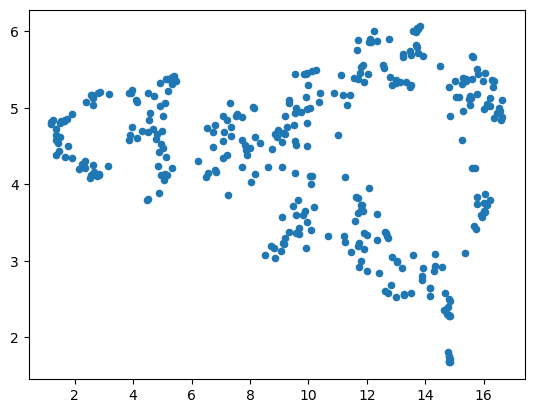

In [52]:
plt.figure()
umap_model = umap.UMAP(random_state=1711)
umap_gs = umap_model.fit_transform(array_ndarray)
plt.scatter(umap_gs[:, 0], umap_gs [:, 1], s=20)

In [54]:
cat_var_Year_Site= df_heading_withoutRowsAberrant1100[['site','Year']]
cat_var_Year_Site=cat_var_Year_Site.reset_index(drop=True)


In [55]:
cat_var_Year_Site_NTrt_Variety= df_heading_withoutRowsAberrant1100[['site','Year','NTrt','Variety']]
cat_var_Year_Site_NTrt_Variety=cat_var_Year_Site_NTrt_Variety.reset_index(drop=True)


In [56]:
cat_var_Year_Site_NTrt_Variety

,site,Year,NTrt,Variety
0,CH,2021,N4,CH_Nara
1,CH,2021,N0,CH_Claro
2,CH,2021,N1,Runal
3,CH,2021,N1,Montalbano
4,CH,2021,N1,CH_Nara
...,...,...,...,...
341,RE,2022,N2,CH_Claro
342,RE,2022,N3,Runal
343,RE,2022,N4,Montalbano
344,RE,2022,N0,CH_Camedo


In [57]:
cat_var_Year_Site

,site,Year
0,CH,2021
1,CH,2021
2,CH,2021
3,CH,2021
4,CH,2021
...,...,...
341,RE,2022
342,RE,2022
343,RE,2022
344,RE,2022


In [58]:
WL_heading_Clean

,rflt_359,rflt_360,rflt_361,rflt_362,rflt_363,rflt_364,rflt_365,rflt_366,rflt_367,rflt_368,...,rflt_2397,rflt_2398,rflt_2399,rflt_2400,rflt_2401,rflt_2402,rflt_2403,rflt_2404,rflt_2405,rflt_2406
0,0.018496,0.018435,0.018400,0.018405,0.018403,0.018397,0.018387,0.018440,0.018525,0.018520,...,0.034948,0.034501,0.031871,0.024511,0.015071,0.004464,0.000000,0.000000,0.019550,0.044989
1,0.020588,0.020687,0.020785,0.020865,0.020946,0.021021,0.021073,0.021132,0.021188,0.021193,...,0.203688,0.194410,0.183538,0.176407,0.170196,0.165126,0.161054,0.156000,0.144307,0.145424
2,0.011134,0.011124,0.011104,0.011091,0.011060,0.011027,0.011021,0.011047,0.011089,0.011094,...,0.020158,0.028507,0.036386,0.038861,0.037701,0.028832,0.014188,0.010170,0.023937,0.032951
3,0.014384,0.014365,0.014328,0.014269,0.014220,0.014181,0.014157,0.014164,0.014190,0.014202,...,0.106759,0.122822,0.140503,0.165561,0.188879,0.196184,0.191652,0.178795,0.151900,0.131347
4,0.031535,0.031565,0.031607,0.031671,0.031738,0.031801,0.031855,0.031862,0.031833,0.031797,...,0.124847,0.127968,0.129268,0.125751,0.118896,0.105622,0.087790,0.086166,0.106193,0.131990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.019242,0.019225,0.019217,0.019220,0.019220,0.019213,0.019193,0.019167,0.019142,0.019142,...,0.047016,0.045436,0.044270,0.044184,0.044723,0.045803,0.047372,0.048214,0.048557,0.047425
342,0.019873,0.019854,0.019848,0.019870,0.019876,0.019877,0.019889,0.019899,0.019909,0.019929,...,0.046027,0.045030,0.044660,0.045637,0.046996,0.047256,0.046851,0.046643,0.046663,0.046926
343,0.017100,0.017062,0.017031,0.016999,0.016990,0.016984,0.016945,0.016906,0.016873,0.016852,...,0.042390,0.041355,0.040736,0.041380,0.042629,0.044108,0.045861,0.046995,0.047523,0.047259
344,0.027034,0.027032,0.027038,0.027049,0.027046,0.027034,0.027017,0.027002,0.026989,0.026977,...,0.045865,0.044340,0.042791,0.041227,0.039767,0.038799,0.038178,0.037160,0.035756,0.033815


In [59]:
merged_df_heading_Site_Year = pd.merge(WL_heading_Clean,cat_var_Year_Site,left_index=True, right_index=True, how='inner')
merged_df_heading_Site_Year

,rflt_359,rflt_360,rflt_361,rflt_362,rflt_363,rflt_364,rflt_365,rflt_366,rflt_367,rflt_368,...,rflt_2399,rflt_2400,rflt_2401,rflt_2402,rflt_2403,rflt_2404,rflt_2405,rflt_2406,site,Year
0,0.018496,0.018435,0.018400,0.018405,0.018403,0.018397,0.018387,0.018440,0.018525,0.018520,...,0.031871,0.024511,0.015071,0.004464,0.000000,0.000000,0.019550,0.044989,CH,2021
1,0.020588,0.020687,0.020785,0.020865,0.020946,0.021021,0.021073,0.021132,0.021188,0.021193,...,0.183538,0.176407,0.170196,0.165126,0.161054,0.156000,0.144307,0.145424,CH,2021
2,0.011134,0.011124,0.011104,0.011091,0.011060,0.011027,0.011021,0.011047,0.011089,0.011094,...,0.036386,0.038861,0.037701,0.028832,0.014188,0.010170,0.023937,0.032951,CH,2021
3,0.014384,0.014365,0.014328,0.014269,0.014220,0.014181,0.014157,0.014164,0.014190,0.014202,...,0.140503,0.165561,0.188879,0.196184,0.191652,0.178795,0.151900,0.131347,CH,2021
4,0.031535,0.031565,0.031607,0.031671,0.031738,0.031801,0.031855,0.031862,0.031833,0.031797,...,0.129268,0.125751,0.118896,0.105622,0.087790,0.086166,0.106193,0.131990,CH,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.019242,0.019225,0.019217,0.019220,0.019220,0.019213,0.019193,0.019167,0.019142,0.019142,...,0.044270,0.044184,0.044723,0.045803,0.047372,0.048214,0.048557,0.047425,RE,2022
342,0.019873,0.019854,0.019848,0.019870,0.019876,0.019877,0.019889,0.019899,0.019909,0.019929,...,0.044660,0.045637,0.046996,0.047256,0.046851,0.046643,0.046663,0.046926,RE,2022
343,0.017100,0.017062,0.017031,0.016999,0.016990,0.016984,0.016945,0.016906,0.016873,0.016852,...,0.040736,0.041380,0.042629,0.044108,0.045861,0.046995,0.047523,0.047259,RE,2022
344,0.027034,0.027032,0.027038,0.027049,0.027046,0.027034,0.027017,0.027002,0.026989,0.026977,...,0.042791,0.041227,0.039767,0.038799,0.038178,0.037160,0.035756,0.033815,RE,2022


In [60]:
merged_df_heading_Site_Year_NTrt_Variety = pd.merge(WL_heading_Clean,cat_var_Year_Site_NTrt_Variety,left_index=True, right_index=True, how='inner')
merged_df_heading_Site_Year_NTrt_Variety

,rflt_359,rflt_360,rflt_361,rflt_362,rflt_363,rflt_364,rflt_365,rflt_366,rflt_367,rflt_368,...,rflt_2401,rflt_2402,rflt_2403,rflt_2404,rflt_2405,rflt_2406,site,Year,NTrt,Variety
0,0.018496,0.018435,0.018400,0.018405,0.018403,0.018397,0.018387,0.018440,0.018525,0.018520,...,0.015071,0.004464,0.000000,0.000000,0.019550,0.044989,CH,2021,N4,CH_Nara
1,0.020588,0.020687,0.020785,0.020865,0.020946,0.021021,0.021073,0.021132,0.021188,0.021193,...,0.170196,0.165126,0.161054,0.156000,0.144307,0.145424,CH,2021,N0,CH_Claro
2,0.011134,0.011124,0.011104,0.011091,0.011060,0.011027,0.011021,0.011047,0.011089,0.011094,...,0.037701,0.028832,0.014188,0.010170,0.023937,0.032951,CH,2021,N1,Runal
3,0.014384,0.014365,0.014328,0.014269,0.014220,0.014181,0.014157,0.014164,0.014190,0.014202,...,0.188879,0.196184,0.191652,0.178795,0.151900,0.131347,CH,2021,N1,Montalbano
4,0.031535,0.031565,0.031607,0.031671,0.031738,0.031801,0.031855,0.031862,0.031833,0.031797,...,0.118896,0.105622,0.087790,0.086166,0.106193,0.131990,CH,2021,N1,CH_Nara
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.019242,0.019225,0.019217,0.019220,0.019220,0.019213,0.019193,0.019167,0.019142,0.019142,...,0.044723,0.045803,0.047372,0.048214,0.048557,0.047425,RE,2022,N2,CH_Claro
342,0.019873,0.019854,0.019848,0.019870,0.019876,0.019877,0.019889,0.019899,0.019909,0.019929,...,0.046996,0.047256,0.046851,0.046643,0.046663,0.046926,RE,2022,N3,Runal
343,0.017100,0.017062,0.017031,0.016999,0.016990,0.016984,0.016945,0.016906,0.016873,0.016852,...,0.042629,0.044108,0.045861,0.046995,0.047523,0.047259,RE,2022,N4,Montalbano
344,0.027034,0.027032,0.027038,0.027049,0.027046,0.027034,0.027017,0.027002,0.026989,0.026977,...,0.039767,0.038799,0.038178,0.037160,0.035756,0.033815,RE,2022,N0,CH_Camedo


In [64]:
subset_CH_2022 = merged_df_heading_Site_Year[(merged_df_heading_Site_Year['site'] =='CH') & (merged_df_heading_Site_Year['Year'] == 2022)]
subset_CH_2022

,rflt_359,rflt_360,rflt_361,rflt_362,rflt_363,rflt_364,rflt_365,rflt_366,rflt_367,rflt_368,...,rflt_2399,rflt_2400,rflt_2401,rflt_2402,rflt_2403,rflt_2404,rflt_2405,rflt_2406,site,Year
75,0.025092,0.025064,0.025030,0.024986,0.024960,0.024939,0.024899,0.024873,0.024858,0.024835,...,0.069362,0.072650,0.076203,0.079736,0.083290,0.086290,0.089102,0.090365,CH,2022
76,0.026528,0.026494,0.026458,0.026409,0.026369,0.026329,0.026275,0.026229,0.026195,0.026180,...,0.035179,0.038275,0.043084,0.049171,0.056453,0.061698,0.065024,0.065534,CH,2022
77,0.020300,0.020258,0.020221,0.020205,0.020177,0.020144,0.020110,0.020097,0.020101,0.020102,...,0.062024,0.058289,0.055373,0.053586,0.052806,0.052758,0.053418,0.054836,CH,2022
78,0.016767,0.016710,0.016650,0.016596,0.016554,0.016520,0.016481,0.016460,0.016452,0.016431,...,0.046032,0.047914,0.049358,0.048633,0.046396,0.046540,0.050448,0.053873,CH,2022
79,0.021582,0.021632,0.021681,0.021725,0.021759,0.021784,0.021795,0.021825,0.021874,0.021936,...,0.131332,0.132019,0.132610,0.131308,0.128709,0.127110,0.127531,0.126745,CH,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.026041,0.026026,0.026013,0.026006,0.025995,0.025979,0.025956,0.025940,0.025934,0.025945,...,0.078014,0.082043,0.087369,0.091404,0.094772,0.096385,0.095571,0.094493,CH,2022
146,0.030574,0.030604,0.030634,0.030664,0.030689,0.030713,0.030749,0.030799,0.030863,0.030942,...,0.119839,0.119785,0.119120,0.117522,0.115174,0.113729,0.113472,0.113657,CH,2022
147,0.022906,0.022948,0.022982,0.023006,0.023041,0.023069,0.023057,0.023061,0.023086,0.023124,...,0.121693,0.125567,0.129948,0.133591,0.136887,0.141408,0.148355,0.153772,CH,2022
148,0.024774,0.024832,0.024878,0.024907,0.024941,0.024975,0.025001,0.025035,0.025083,0.025162,...,0.156137,0.153435,0.149353,0.145554,0.141692,0.139228,0.138222,0.138696,CH,2022


In [65]:
subset_CH_2022_df = merged_df_heading_Site_Year_NTrt_Variety[(merged_df_heading_Site_Year_NTrt_Variety['site'] =='CH') & (merged_df_heading_Site_Year_NTrt_Variety['Year'] == 2022)]
subset_CH_2022_df

,rflt_359,rflt_360,rflt_361,rflt_362,rflt_363,rflt_364,rflt_365,rflt_366,rflt_367,rflt_368,...,rflt_2401,rflt_2402,rflt_2403,rflt_2404,rflt_2405,rflt_2406,site,Year,NTrt,Variety
75,0.025092,0.025064,0.025030,0.024986,0.024960,0.024939,0.024899,0.024873,0.024858,0.024835,...,0.076203,0.079736,0.083290,0.086290,0.089102,0.090365,CH,2022,N3,Runal
76,0.026528,0.026494,0.026458,0.026409,0.026369,0.026329,0.026275,0.026229,0.026195,0.026180,...,0.043084,0.049171,0.056453,0.061698,0.065024,0.065534,CH,2022,N4,CH_Nara
77,0.020300,0.020258,0.020221,0.020205,0.020177,0.020144,0.020110,0.020097,0.020101,0.020102,...,0.055373,0.053586,0.052806,0.052758,0.053418,0.054836,CH,2022,N4,Runal
78,0.016767,0.016710,0.016650,0.016596,0.016554,0.016520,0.016481,0.016460,0.016452,0.016431,...,0.049358,0.048633,0.046396,0.046540,0.050448,0.053873,CH,2022,N2,Montalbano
79,0.021582,0.021632,0.021681,0.021725,0.021759,0.021784,0.021795,0.021825,0.021874,0.021936,...,0.132610,0.131308,0.128709,0.127110,0.127531,0.126745,CH,2022,N0,Montalbano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.026041,0.026026,0.026013,0.026006,0.025995,0.025979,0.025956,0.025940,0.025934,0.025945,...,0.087369,0.091404,0.094772,0.096385,0.095571,0.094493,CH,2022,N4,CH_Camedo
146,0.030574,0.030604,0.030634,0.030664,0.030689,0.030713,0.030749,0.030799,0.030863,0.030942,...,0.119120,0.117522,0.115174,0.113729,0.113472,0.113657,CH,2022,N2,CH_Nara
147,0.022906,0.022948,0.022982,0.023006,0.023041,0.023069,0.023057,0.023061,0.023086,0.023124,...,0.129948,0.133591,0.136887,0.141408,0.148355,0.153772,CH,2022,N2,CH_Claro
148,0.024774,0.024832,0.024878,0.024907,0.024941,0.024975,0.025001,0.025035,0.025083,0.025162,...,0.149353,0.145554,0.141692,0.139228,0.138222,0.138696,CH,2022,N1,Montalbano


In [66]:
subset_CH_2022.drop('site', axis=1, inplace=True)
subset_CH_2022.drop('Year', axis=1, inplace=True)
subset_CH_2022

C:\Users\vuill\AppData\Local\Temp\ipykernel_48836\1166397512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_CH_2022.drop('site', axis=1, inplace=True)
C:\Users\vuill\AppData\Local\Temp\ipykernel_48836\1166397512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_CH_2022.drop('Year', axis=1, inplace=True)


,rflt_359,rflt_360,rflt_361,rflt_362,rflt_363,rflt_364,rflt_365,rflt_366,rflt_367,rflt_368,...,rflt_2397,rflt_2398,rflt_2399,rflt_2400,rflt_2401,rflt_2402,rflt_2403,rflt_2404,rflt_2405,rflt_2406
75,0.025092,0.025064,0.025030,0.024986,0.024960,0.024939,0.024899,0.024873,0.024858,0.024835,...,0.064027,0.066476,0.069362,0.072650,0.076203,0.079736,0.083290,0.086290,0.089102,0.090365
76,0.026528,0.026494,0.026458,0.026409,0.026369,0.026329,0.026275,0.026229,0.026195,0.026180,...,0.036086,0.034952,0.035179,0.038275,0.043084,0.049171,0.056453,0.061698,0.065024,0.065534
77,0.020300,0.020258,0.020221,0.020205,0.020177,0.020144,0.020110,0.020097,0.020101,0.020102,...,0.072230,0.067061,0.062024,0.058289,0.055373,0.053586,0.052806,0.052758,0.053418,0.054836
78,0.016767,0.016710,0.016650,0.016596,0.016554,0.016520,0.016481,0.016460,0.016452,0.016431,...,0.042692,0.044378,0.046032,0.047914,0.049358,0.048633,0.046396,0.046540,0.050448,0.053873
79,0.021582,0.021632,0.021681,0.021725,0.021759,0.021784,0.021795,0.021825,0.021874,0.021936,...,0.131983,0.131525,0.131332,0.132019,0.132610,0.131308,0.128709,0.127110,0.127531,0.126745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.026041,0.026026,0.026013,0.026006,0.025995,0.025979,0.025956,0.025940,0.025934,0.025945,...,0.077903,0.076961,0.078014,0.082043,0.087369,0.091404,0.094772,0.096385,0.095571,0.094493
146,0.030574,0.030604,0.030634,0.030664,0.030689,0.030713,0.030749,0.030799,0.030863,0.030942,...,0.117869,0.118976,0.119839,0.119785,0.119120,0.117522,0.115174,0.113729,0.113472,0.113657
147,0.022906,0.022948,0.022982,0.023006,0.023041,0.023069,0.023057,0.023061,0.023086,0.023124,...,0.116534,0.118560,0.121693,0.125567,0.129948,0.133591,0.136887,0.141408,0.148355,0.153772
148,0.024774,0.024832,0.024878,0.024907,0.024941,0.024975,0.025001,0.025035,0.025083,0.025162,...,0.154369,0.156061,0.156137,0.153435,0.149353,0.145554,0.141692,0.139228,0.138222,0.138696


In [67]:
array_2d_CH_2022 = subset_CH_2022[['rflt_450', 'rflt_740']].values

C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


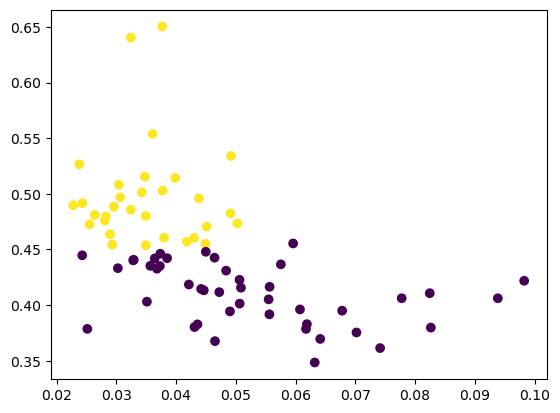

C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


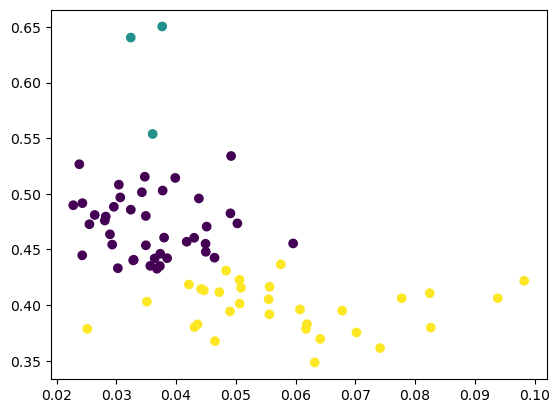

C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


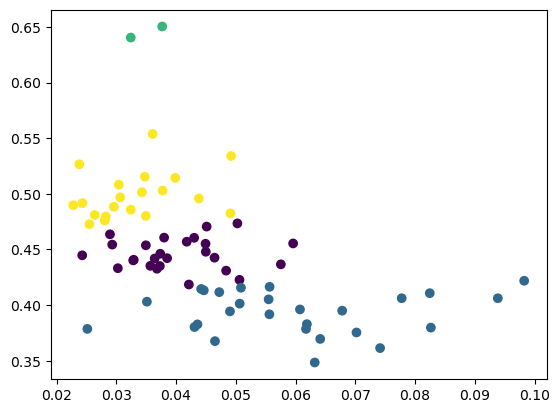

C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


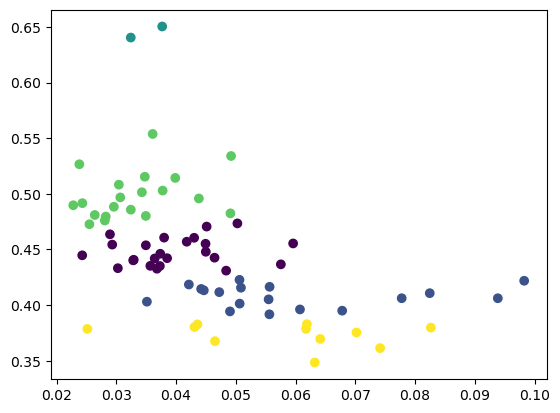

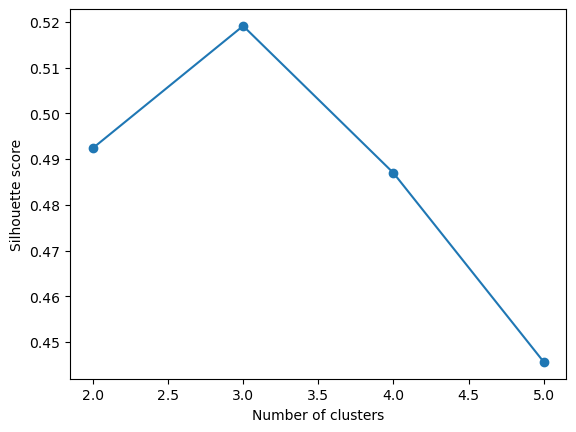

In [68]:
sil=[]

for iclust in range(2,6):
    clusterer = KMeans(n_clusters=iclust, random_state=10, n_init=10)
    cluster_labels = clusterer.fit_predict(array_2d_CH_2022)
    score=silhouette_score(array_2d_CH_2022,cluster_labels)
    sil.append(score)
    plt.scatter(array_2d_CH_2022[:,0],array_2d_CH_2022[:,1],c=cluster_labels)
    plt.show()

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.plot(np.arange(len(sil))+2, sil,'-o')
plt.show()

In [69]:
# Convert the entire DataFrame to a NumPy ndarray
array_ndarray_CH_2022 =subset_CH_2022.values

Number of clusters considered:  2


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of clusters considered:  3


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of clusters considered:  4


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of clusters considered:  5


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of clusters considered:  6


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of clusters considered:  7


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of clusters considered:  8


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of clusters considered:  9


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of clusters considered:  10


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of clusters considered:  11


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of clusters considered:  12


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of clusters considered:  13


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of clusters considered:  14


C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vuill\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


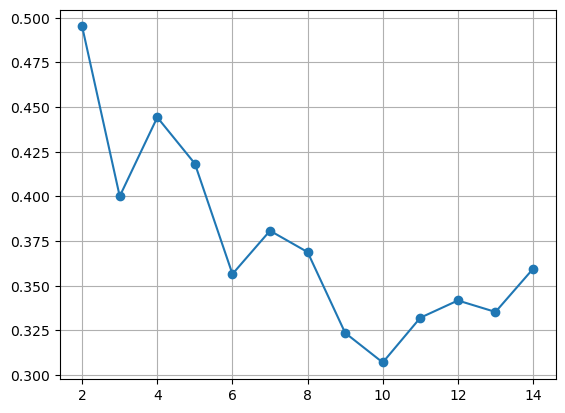

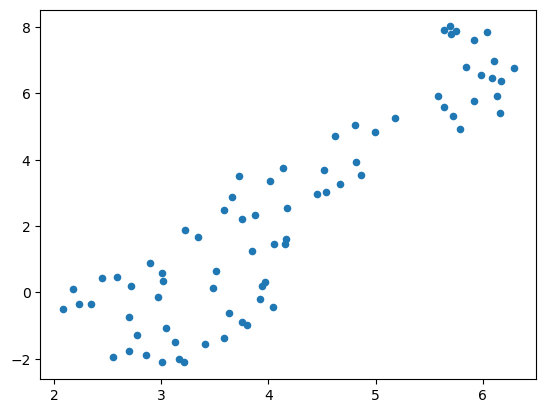

In [70]:
### In this exercise you are given the dataset points, consisting of high-dimensional data. It was built taking random 
#samples from a number k of multimensional gaussians. The data is therefore made of k clusters but, being 
#very high dimensional, you cannot visualize it. Your task it too use K-means combined with the Silouhette 
#score to find the number of k.

plt.figure()
scores=[]
for itrial in range(2,15):
    print('Number of clusters considered: ',itrial)
    clusterer = KMeans(n_clusters=itrial, random_state=10)
    cluster_labels = clusterer.fit_predict(array_ndarray_CH_2022)
    score=silhouette_score(array_ndarray_CH_2022,cluster_labels)
    scores.append(score)

# 3. Plot the Silhouette scores as a function ok k? What is the number of clusters ?
plt.grid()
plt.plot(np.arange(len(scores))+2,np.array(scores),'-o')

# 4. Optional. Check the result that you found via umap. 
plt.figure()
umap_model = umap.UMAP(random_state=1711)
umap_gs = umap_model.fit_transform(array_ndarray_CH_2022)
plt.scatter(umap_gs[:, 0], umap_gs [:, 1], s=20)

C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


2 -2709.7419004900944 -2667.4310739644593


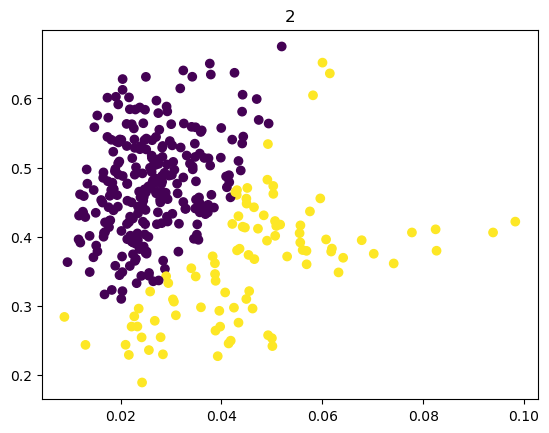

C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


3 -2702.339134617804 -2636.949675441823


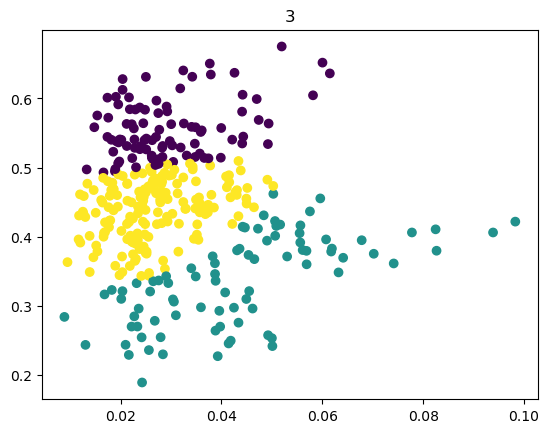

C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


4 -2724.7742021326544 -2636.306110306327


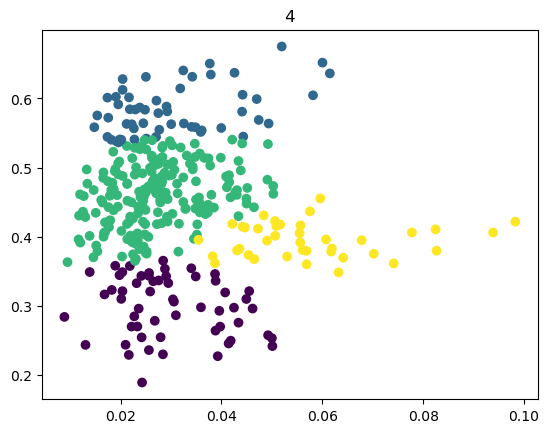

C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


5 -2768.7673434849125 -2657.2206190082384


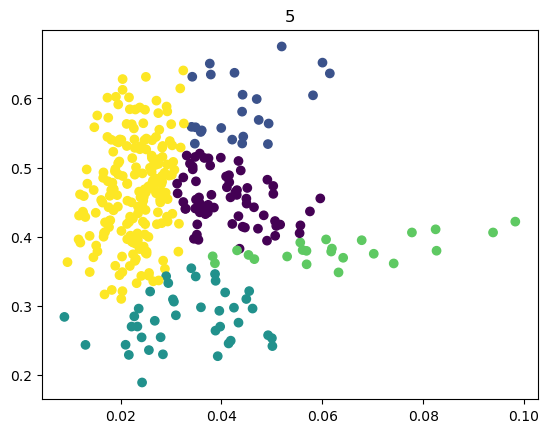

In [71]:
points=array_2d

aic=[]
bic=[]
sil=[]

for i_comp in range(2,6):
    plt.figure()
    plt.title(str(i_comp))
    clf = GaussianMixture(n_components=i_comp, covariance_type='full')
    clf.fit(points)
    cluster_labels=clf.predict(points)
    plt.scatter(points[:,0],points[:,1],c=cluster_labels)
    print(i_comp,clf.aic(points),clf.bic(points))
    score=silhouette_score(points,cluster_labels)
    aic.append(clf.aic(points))
    bic.append(clf.bic(points))
    sil.append(score)
    plt.show()

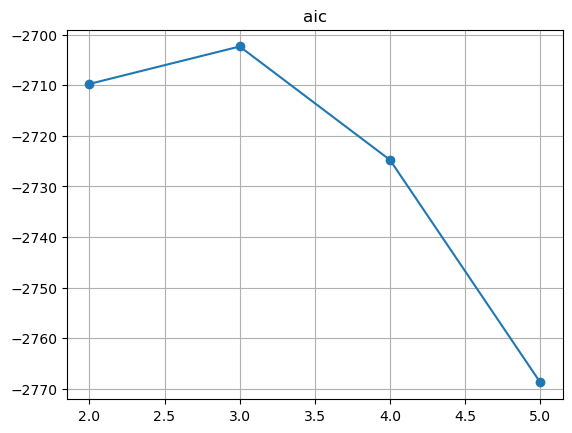

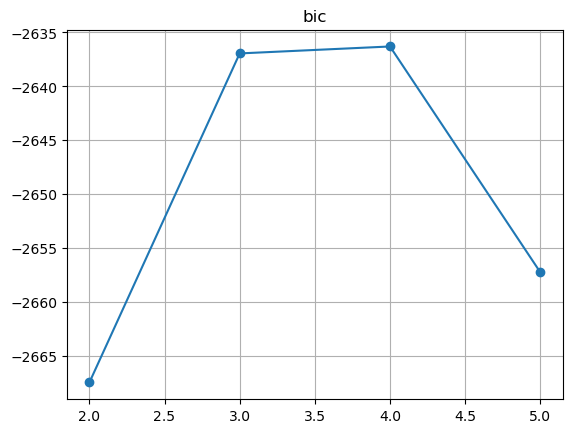

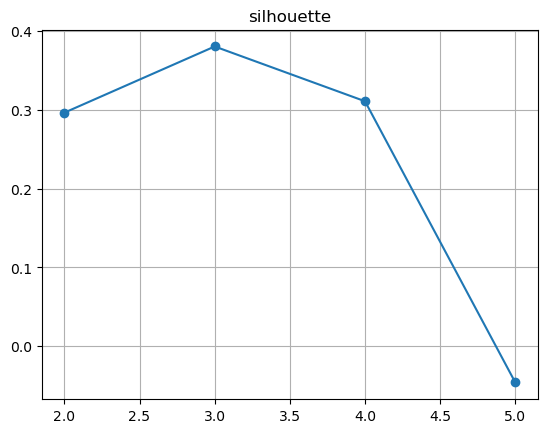

In [72]:
plt.plot(np.arange(2,6),aic,'-o')
plt.title('aic')
plt.grid()
plt.show()

plt.plot(np.arange(2,6),bic,'-o')
plt.title('bic')
plt.grid()
plt.show()

plt.plot(np.arange(2,6),sil,'-o')
plt.title('silhouette')
plt.grid()
plt.show()

C:\Users\vuill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\vuill\AppData\Local\Temp\ipykernel_48836\1729938215.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


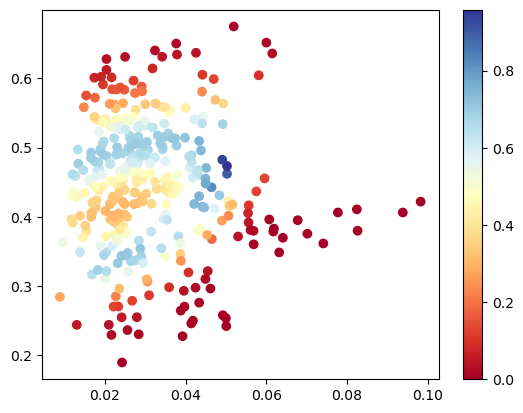

In [73]:
#In this exercise you need to load the dataset used to present K-means ( def km_load_th1() ) or the one used to discuss 
# the Gaussian mixtures model ( def gm_load_th1() ). 
#As discussed, applying a fitting based on gaussian mixtures you can not only predict the cluster label for each point, 
#but also a probability distribution over the clusters. 

#From this probability distribution, you can compute for each point the entropy of the corresponging 
#distribution (using for example scipy.stats.entropy) as an estimation of the undertainty of the prediction. 
#Your task is to plot the data-cloud with a color proportional to the uncertainty of the cluster assignement.

# In detail you shoud:
# 1. Instantiate a GaussianMixture object with the number of clusters that you expect
# 2. fit the object on the dataset with the fit method 

from scipy.stats import entropy

plt.figure()
clf = GaussianMixture(n_components=3, covariance_type='full')

clf.fit(points)

# 3. compute the cluster probabilities using the method predict_proba. This will return a matrix of 
# dimension npoints x nclusters
# 4. use the entropy function ( from scipy.stats import entropy ) to evaluate for each point the uncertainty of the 
#prediction

cluster_labels_prob=clf.predict_proba(points)

entropies=[]
for point in range(len(cluster_labels_prob)):
    entropies.append(entropy(cluster_labels_prob[point]))

# 5. Plot the points colored accordingly to their uncertanty. 

cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(points[:,0], points[:,1], c=entropies, cmap=cm)
plt.colorbar(sc)

In [74]:
from sklearn import tree
from sklearn import ensemble

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from matplotlib import  pyplot as plt
import seaborn as sns
#sns.set()

from time import time as timer
from imageio import imread
import pandas as pd
import numpy as np
import os

from sklearn.manifold import TSNE

import tensorflow as tf
import tarfile

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

In [75]:
tsne_model = TSNE(perplexity=30, n_components=2, learning_rate=200, early_exaggeration=4.0,init='pca',
                      n_iter=2000, random_state=2233212, metric='euclidean', verbose=100 )

umap_model = umap.UMAP(n_neighbors=30, n_components=2, random_state=1711)

In [77]:
tsne_model = TSNE(perplexity=30, n_components=2, learning_rate=200, early_exaggeration=4.0,init='pca',
                      n_iter=300, random_state=2233212, metric='euclidean', verbose=1 )

tsne_heart = tsne_model.fit_transform(array_ndarray)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 346 samples in 0.004s...
[t-SNE] Computed neighbors for 346 samples in 0.235s...
[t-SNE] Computed conditional probabilities for sample 346 / 346
[t-SNE] Mean sigma: 0.802837
[t-SNE] KL divergence after 250 iterations with early exaggeration: 10.303354
[t-SNE] KL divergence after 300 iterations: 0.372581


In [78]:
array_ndarray

array([[0.018496, 0.018435, 0.0184  , ..., 0.      , 0.01955 , 0.044989],
       [0.020588, 0.020687, 0.020785, ..., 0.156   , 0.144307, 0.145424],
       [0.011134, 0.011124, 0.011104, ..., 0.01017 , 0.023937, 0.032951],
       ...,
       [0.0171  , 0.017062, 0.017031, ..., 0.046995, 0.047523, 0.047259],
       [0.027034, 0.027032, 0.027038, ..., 0.03716 , 0.035756, 0.033815],
       [0.019453, 0.019417, 0.019388, ..., 0.03328 , 0.030822, 0.028437]])

In [79]:
tsne_model = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3, verbose=1)

tsne_WL_Whole = tsne_model.fit_transform(array_ndarray)

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 346 samples in 0.003s...
[t-SNE] Computed neighbors for 346 samples in 0.181s...
[t-SNE] Computed conditional probabilities for sample 346 / 346
[t-SNE] Mean sigma: 0.286639
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.481903
[t-SNE] KL divergence after 1000 iterations: 0.585678


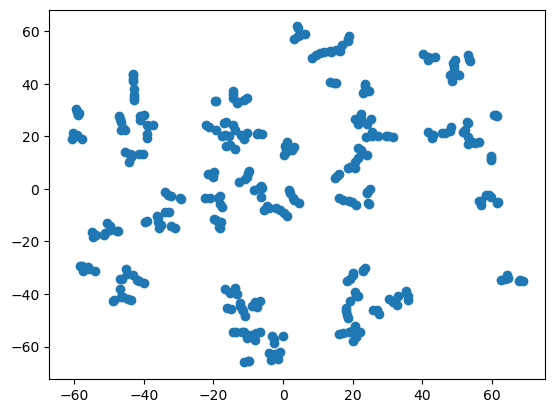

In [80]:
plt.scatter(tsne_WL_Whole[:,0],tsne_WL_Whole[:,1])
plt.show()

In [81]:
tsne_model = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10, verbose=1)

tsne_WL_Whole = tsne_model.fit_transform(array_ndarray)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 346 samples in 0.003s...
[t-SNE] Computed neighbors for 346 samples in 0.183s...
[t-SNE] Computed conditional probabilities for sample 346 / 346
[t-SNE] Mean sigma: 0.513485
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.927383
[t-SNE] KL divergence after 1000 iterations: 0.543645


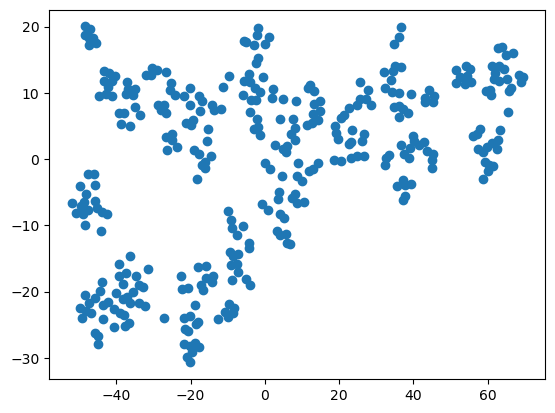

In [82]:
plt.scatter(tsne_WL_Whole[:,0],tsne_WL_Whole[:,1])
plt.show()

C:\Users\vuill\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


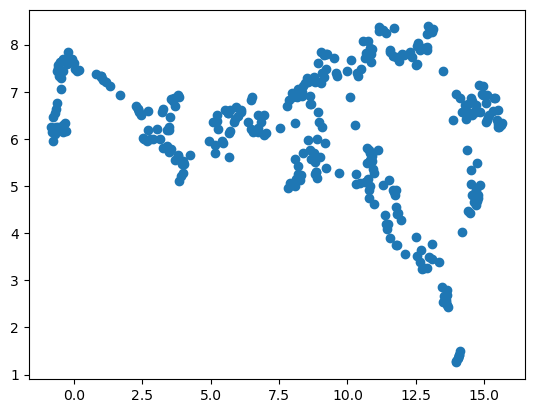

In [83]:
umap_model = umap.UMAP(n_neighbors=10, n_components=2, random_state=1711)

umap_hart = umap_model.fit_transform(array_ndarray)
plt.scatter(umap_hart[:, 0], umap_hart[:, 1])
plt.show()

In [84]:
labels=df_heading_withoutRowsAberrant1100['site'].values
labels

array(['CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH',
       'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH',
       'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH',
       'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH',
       'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH',
       'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH',
       'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH',
       'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH',
       'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH',
       'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH',
       'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH',
       'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH',
       'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH',
       'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'CH', 'G

In [85]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

print(numeric_labels)  # Output might look like: [0, 1, 0, 2, 1]
print(label_encoder.classes_)  # Output: ['apple' 'banana' 'orange']

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]
['CH' 'GO' 'RE']


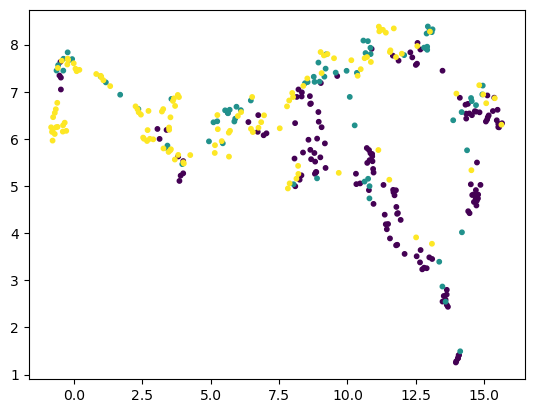

In [86]:
plt.scatter(umap_hart[:, 0], umap_hart[:, 1], c=numeric_labels, s=10)
plt.show()

C:\Users\vuill\AppData\Local\Temp\ipykernel_48836\547831373.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis", len(np.unique(numeric_labels)))  # change 'viridis' if desired


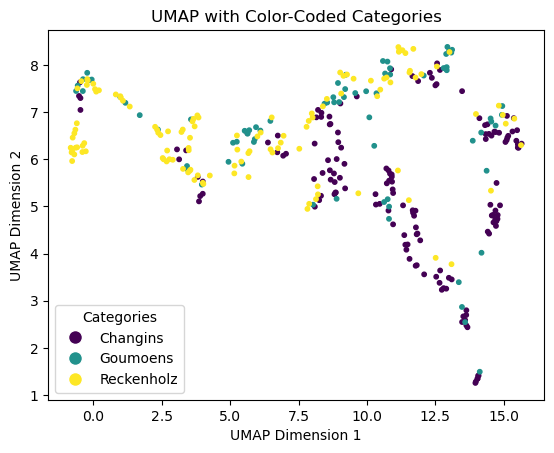

In [87]:
# Create custom legend

cmap = plt.cm.get_cmap("viridis", len(np.unique(numeric_labels)))  # change 'viridis' if desired

plt.scatter(umap_hart[:, 0], umap_hart[:, 1], c=numeric_labels,cmap=cmap,s=10)

labels = ["Changins", "Goumoens", "Reckenholz"]  # change to your actual category names


legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=labels[i],
                             markerfacecolor=cmap(i), markersize=10)
                  for i in range(len(labels))]

# Add legend to the plot
plt.legend(handles=legend_handles, title="Categories")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("UMAP with Color-Coded Categories")
plt.show()

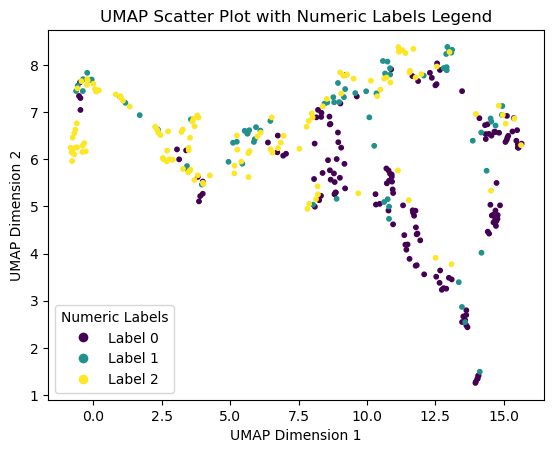

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Define unique labels and assign each a color
unique_labels = np.unique(numeric_labels)
colors = cm.viridis(np.linspace(0, 1, len(unique_labels)))  # viridis colormap for distinct colors

# Create scatter plot
plt.scatter(umap_hart[:, 0], umap_hart[:, 1], c=numeric_labels, cmap="viridis", s=10)

# Create custom legend using unique labels and colors
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Label {label}',
                             markerfacecolor=colors[i], markersize=8)
                  for i, label in enumerate(unique_labels)]

# Add legend to the plot
plt.legend(handles=legend_handles, title="Numeric Labels")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("UMAP Scatter Plot with Numeric Labels Legend")
plt.show()

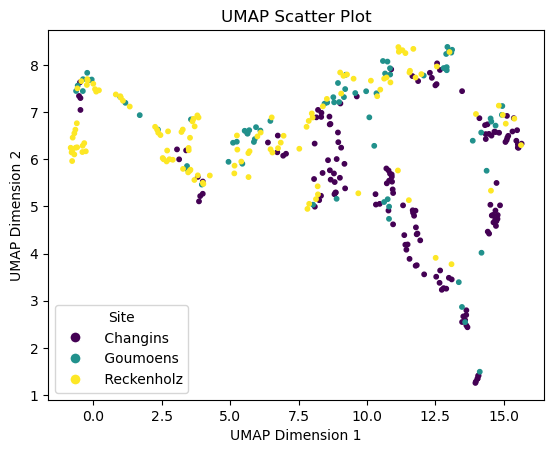

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Define unique labels and assign each a color
unique_labels = np.unique(labels)
colors = cm.viridis(np.linspace(0, 1, len(unique_labels)))  # viridis colormap for distinct colors

# Create scatter plot
plt.scatter(umap_hart[:, 0], umap_hart[:, 1], c=numeric_labels, cmap="viridis", s=10)

# Create custom legend using unique labels and colors
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f' {label}',
                             markerfacecolor=colors[i], markersize=8)
                  for i, label in enumerate(unique_labels)]

# Add legend to the plot
plt.legend(handles=legend_handles, title="Site")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("UMAP Scatter Plot")
plt.show()

In [90]:
labels=df_heading_withoutRowsAberrant1100['Year'].values
labels

array([2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,
       2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,
       2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,
       2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,
       2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,
       2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,
       2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2022,
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 20

In [91]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

print(numeric_labels)  # Output might look like: [0, 1, 0, 2, 1]
print(label_encoder.classes_)  # Output: ['apple' 'banana' 'orange']

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2021 2022]


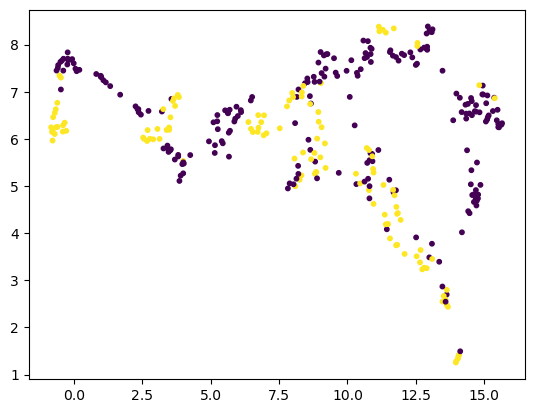

In [92]:
plt.scatter(umap_hart[:, 0], umap_hart[:, 1], c=numeric_labels, s=10)
plt.show()

C:\Users\vuill\AppData\Local\Temp\ipykernel_48836\2494936664.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis", len(np.unique(numeric_labels)))  # change 'viridis' if desired


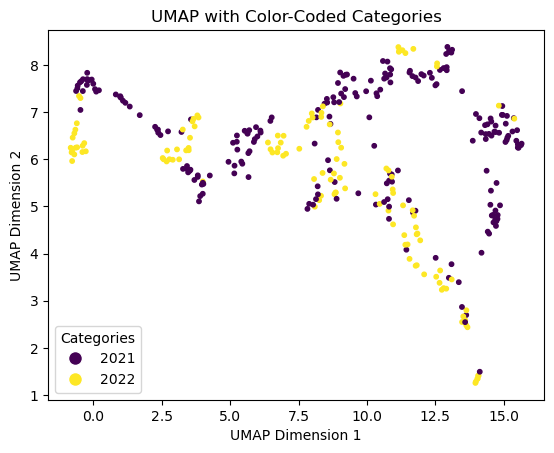

In [93]:
# Create custom legend

cmap = plt.cm.get_cmap("viridis", len(np.unique(numeric_labels)))  # change 'viridis' if desired

plt.scatter(umap_hart[:, 0], umap_hart[:, 1], c=numeric_labels,cmap=cmap,s=10)

labels = ["2021", "2022"]  # change to your actual category names


legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=labels[i],
                             markerfacecolor=cmap(i), markersize=10)
                  for i in range(len(labels))]

# Add legend to the plot
plt.legend(handles=legend_handles, title="Categories")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("UMAP with Color-Coded Categories")
plt.show()

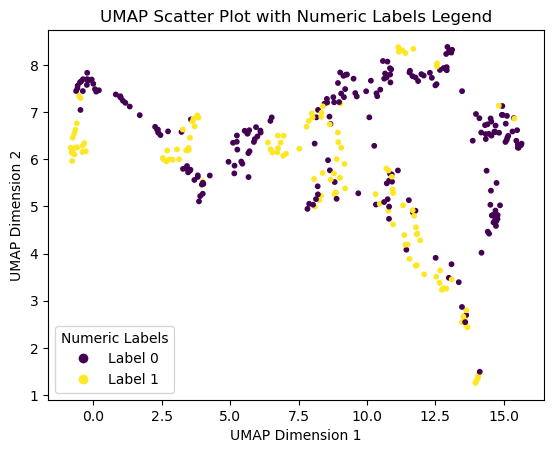

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Define unique labels and assign each a color
unique_labels = np.unique(numeric_labels)
colors = cm.viridis(np.linspace(0, 1, len(unique_labels)))  # viridis colormap for distinct colors

# Create scatter plot
plt.scatter(umap_hart[:, 0], umap_hart[:, 1], c=numeric_labels, cmap="viridis", s=10)

# Create custom legend using unique labels and colors
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Label {label}',
                             markerfacecolor=colors[i], markersize=8)
                  for i, label in enumerate(unique_labels)]

# Add legend to the plot
plt.legend(handles=legend_handles, title="Numeric Labels")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("UMAP Scatter Plot with Numeric Labels Legend")
plt.show()

In [95]:
tsne_model = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3, verbose=1)

tsne_WL_Whole = tsne_model.fit_transform(array_2d_CH_2022)

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 75 samples in 0.001s...
[t-SNE] Computed neighbors for 75 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 75 / 75
[t-SNE] Mean sigma: 0.005036
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.947060
[t-SNE] KL divergence after 1000 iterations: 0.244645


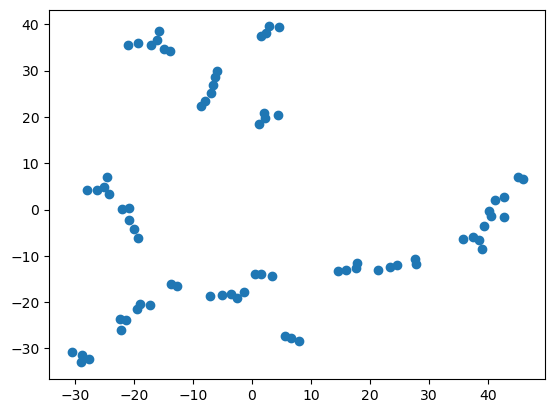

In [96]:
plt.scatter(tsne_WL_Whole[:,0],tsne_WL_Whole[:,1])
plt.show()

In [97]:
tsne_model = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=6, verbose=1)

tsne_WL_Whole = tsne_model.fit_transform(array_2d_CH_2022)

[t-SNE] Computing 19 nearest neighbors...
[t-SNE] Indexed 75 samples in 0.001s...
[t-SNE] Computed neighbors for 75 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 75 / 75
[t-SNE] Mean sigma: 0.008045
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.532017
[t-SNE] KL divergence after 1000 iterations: 0.243515


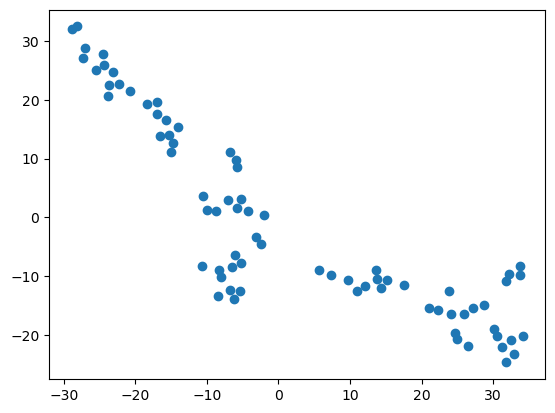

In [98]:
plt.scatter(tsne_WL_Whole[:,0],tsne_WL_Whole[:,1])
plt.show()

In [99]:
tsne_model = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=2, verbose=1)

tsne_WL_Whole = tsne_model.fit_transform(array_2d_CH_2022)

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 75 samples in 0.001s...
[t-SNE] Computed neighbors for 75 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 75 / 75
[t-SNE] Mean sigma: 0.003545
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.398727
[t-SNE] KL divergence after 1000 iterations: 0.251505


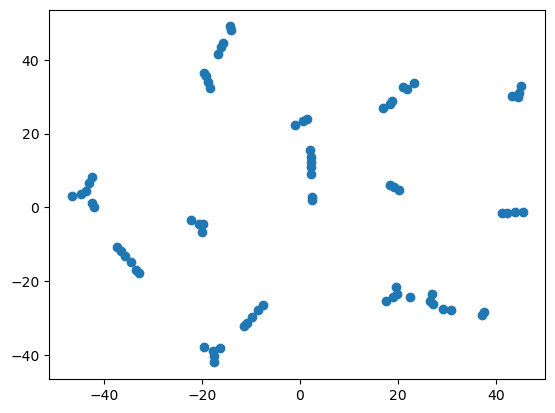

In [100]:
plt.scatter(tsne_WL_Whole[:,0],tsne_WL_Whole[:,1])
plt.show()

C:\Users\vuill\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


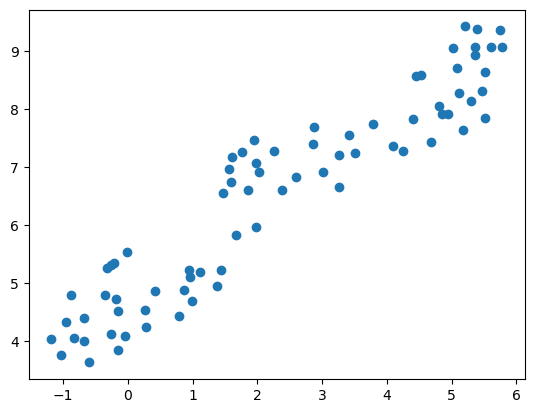

In [101]:
umap_model = umap.UMAP(n_neighbors=50, n_components=2, random_state=1711)

umap_hart = umap_model.fit_transform(array_2d_CH_2022)
plt.scatter(umap_hart[:, 0], umap_hart[:, 1])
plt.show()

In [102]:
subset_CH_2022_df

,rflt_359,rflt_360,rflt_361,rflt_362,rflt_363,rflt_364,rflt_365,rflt_366,rflt_367,rflt_368,...,rflt_2401,rflt_2402,rflt_2403,rflt_2404,rflt_2405,rflt_2406,site,Year,NTrt,Variety
75,0.025092,0.025064,0.025030,0.024986,0.024960,0.024939,0.024899,0.024873,0.024858,0.024835,...,0.076203,0.079736,0.083290,0.086290,0.089102,0.090365,CH,2022,N3,Runal
76,0.026528,0.026494,0.026458,0.026409,0.026369,0.026329,0.026275,0.026229,0.026195,0.026180,...,0.043084,0.049171,0.056453,0.061698,0.065024,0.065534,CH,2022,N4,CH_Nara
77,0.020300,0.020258,0.020221,0.020205,0.020177,0.020144,0.020110,0.020097,0.020101,0.020102,...,0.055373,0.053586,0.052806,0.052758,0.053418,0.054836,CH,2022,N4,Runal
78,0.016767,0.016710,0.016650,0.016596,0.016554,0.016520,0.016481,0.016460,0.016452,0.016431,...,0.049358,0.048633,0.046396,0.046540,0.050448,0.053873,CH,2022,N2,Montalbano
79,0.021582,0.021632,0.021681,0.021725,0.021759,0.021784,0.021795,0.021825,0.021874,0.021936,...,0.132610,0.131308,0.128709,0.127110,0.127531,0.126745,CH,2022,N0,Montalbano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.026041,0.026026,0.026013,0.026006,0.025995,0.025979,0.025956,0.025940,0.025934,0.025945,...,0.087369,0.091404,0.094772,0.096385,0.095571,0.094493,CH,2022,N4,CH_Camedo
146,0.030574,0.030604,0.030634,0.030664,0.030689,0.030713,0.030749,0.030799,0.030863,0.030942,...,0.119120,0.117522,0.115174,0.113729,0.113472,0.113657,CH,2022,N2,CH_Nara
147,0.022906,0.022948,0.022982,0.023006,0.023041,0.023069,0.023057,0.023061,0.023086,0.023124,...,0.129948,0.133591,0.136887,0.141408,0.148355,0.153772,CH,2022,N2,CH_Claro
148,0.024774,0.024832,0.024878,0.024907,0.024941,0.024975,0.025001,0.025035,0.025083,0.025162,...,0.149353,0.145554,0.141692,0.139228,0.138222,0.138696,CH,2022,N1,Montalbano


In [103]:
labels=subset_CH_2022_df['NTrt'].values
labels

array(['N3', 'N4', 'N4', 'N2', 'N0', 'N2', 'N4', 'N3', 'N4', 'N1', 'N0',
       'N1', 'N1', 'N2', 'N1', 'N1', 'N0', 'N0', 'N3', 'N2', 'N4', 'N2',
       'N3', 'N3', 'N0', 'N4', 'N2', 'N2', 'N4', 'N3', 'N1', 'N3', 'N2',
       'N0', 'N2', 'N0', 'N0', 'N0', 'N3', 'N4', 'N4', 'N2', 'N1', 'N0',
       'N4', 'N3', 'N1', 'N1', 'N1', 'N3', 'N2', 'N0', 'N1', 'N0', 'N3',
       'N4', 'N1', 'N4', 'N0', 'N0', 'N3', 'N2', 'N4', 'N1', 'N1', 'N3',
       'N4', 'N3', 'N2', 'N3', 'N4', 'N2', 'N2', 'N1', 'N0'], dtype=object)

In [104]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

print(numeric_labels)  # Output might look like: [0, 1, 0, 2, 1]
print(label_encoder.classes_)  # Output: ['apple' 'banana' 'orange']

[3 4 4 2 0 2 4 3 4 1 0 1 1 2 1 1 0 0 3 2 4 2 3 3 0 4 2 2 4 3 1 3 2 0 2 0 0
 0 3 4 4 2 1 0 4 3 1 1 1 3 2 0 1 0 3 4 1 4 0 0 3 2 4 1 1 3 4 3 2 3 4 2 2 1
 0]
['N0' 'N1' 'N2' 'N3' 'N4']


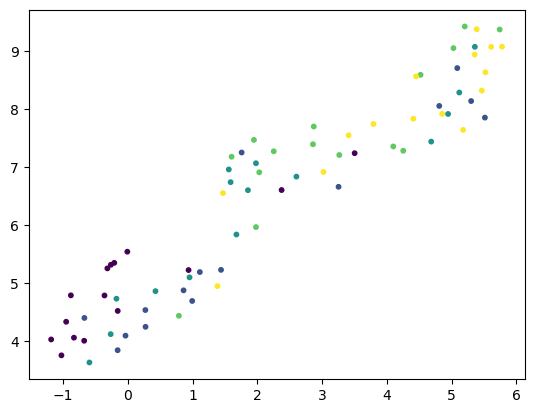

In [105]:
plt.scatter(umap_hart[:, 0], umap_hart[:, 1], c=numeric_labels, s=10)
plt.show()

C:\Users\vuill\AppData\Local\Temp\ipykernel_48836\2141595922.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis", len(np.unique(numeric_labels)))  # change 'viridis' if desired


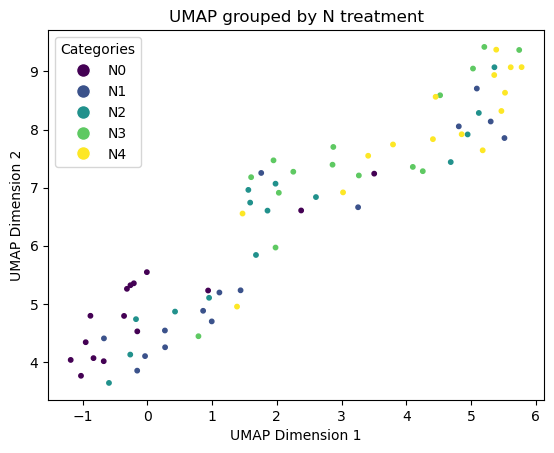

In [106]:
# Create custom legend

cmap = plt.cm.get_cmap("viridis", len(np.unique(numeric_labels)))  # change 'viridis' if desired

plt.scatter(umap_hart[:, 0], umap_hart[:, 1], c=numeric_labels,cmap=cmap,s=10)

labels = ["N0","N1", "N2", "N3","N4"]  # change to your actual category names


legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=labels[i],
                             markerfacecolor=cmap(i), markersize=10)
                  for i in range(len(labels))]

# Add legend to the plot
plt.legend(handles=legend_handles, title="Categories")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("UMAP grouped by N treatment")
plt.show()

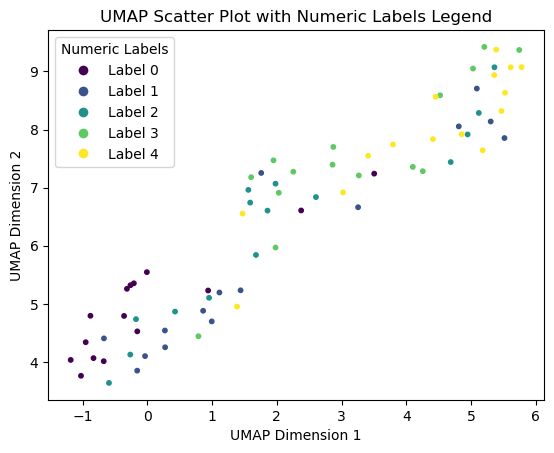

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Define unique labels and assign each a color
unique_labels = np.unique(numeric_labels)
colors = cm.viridis(np.linspace(0, 1, len(unique_labels)))  # viridis colormap for distinct colors

# Create scatter plot
plt.scatter(umap_hart[:, 0], umap_hart[:, 1], c=numeric_labels, cmap="viridis", s=10)

# Create custom legend using unique labels and colors
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Label {label}',
                             markerfacecolor=colors[i], markersize=8)
                  for i, label in enumerate(unique_labels)]

# Add legend to the plot
plt.legend(handles=legend_handles, title="Numeric Labels")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("UMAP Scatter Plot with Numeric Labels Legend")
plt.show()

In [108]:
labels=subset_CH_2022_df['Variety'].values
labels

array(['Runal', 'CH_Nara', 'Runal', 'Montalbano', 'Montalbano',
       'CH_Claro', 'Montalbano', 'CH_Claro', 'CH_Camedo', 'CH_Nara',
       'Runal', 'Runal', 'Montalbano', 'CH_Camedo', 'CH_Camedo',
       'CH_Claro', 'CH_Claro', 'CH_Nara', 'CH_Nara', 'CH_Nara',
       'CH_Claro', 'Runal', 'CH_Camedo', 'Montalbano', 'CH_Camedo',
       'Montalbano', 'CH_Nara', 'CH_Camedo', 'CH_Claro', 'Montalbano',
       'Montalbano', 'CH_Camedo', 'Montalbano', 'CH_Camedo', 'Runal',
       'CH_Nara', 'Montalbano', 'CH_Claro', 'CH_Claro', 'Runal',
       'CH_Nara', 'CH_Claro', 'CH_Nara', 'Runal', 'CH_Camedo', 'Runal',
       'CH_Camedo', 'Runal', 'CH_Claro', 'CH_Nara', 'Runal', 'CH_Camedo',
       'CH_Camedo', 'CH_Nara', 'CH_Nara', 'CH_Nara', 'Runal', 'CH_Claro',
       'Montalbano', 'CH_Claro', 'CH_Camedo', 'Montalbano', 'Montalbano',
       'CH_Claro', 'CH_Nara', 'Montalbano', 'Runal', 'Runal', 'CH_Camedo',
       'CH_Claro', 'CH_Camedo', 'CH_Nara', 'CH_Claro', 'Montalbano',
       'Runal'], dtype=obj

In [109]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

print(numeric_labels)  # Output might look like: [0, 1, 0, 2, 1]
print(label_encoder.classes_)  # Output: ['apple' 'banana' 'orange']

[4 2 4 3 3 1 3 1 0 2 4 4 3 0 0 1 1 2 2 2 1 4 0 3 0 3 2 0 1 3 3 0 3 0 4 2 3
 1 1 4 2 1 2 4 0 4 0 4 1 2 4 0 0 2 2 2 4 1 3 1 0 3 3 1 2 3 4 4 0 1 0 2 1 3
 4]
['CH_Camedo' 'CH_Claro' 'CH_Nara' 'Montalbano' 'Runal']


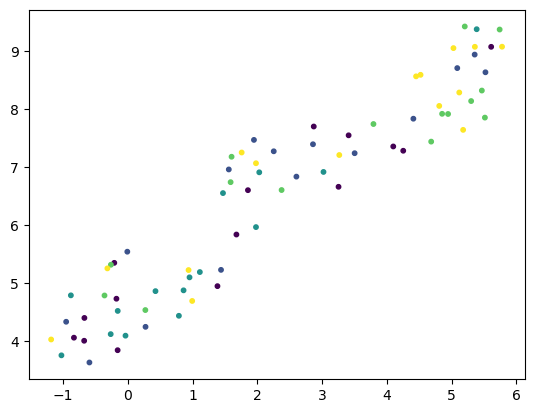

In [110]:
plt.scatter(umap_hart[:, 0], umap_hart[:, 1], c=numeric_labels, s=10)
plt.show()

C:\Users\vuill\AppData\Local\Temp\ipykernel_48836\2541084671.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis", len(np.unique(numeric_labels)))  # change 'viridis' if desired


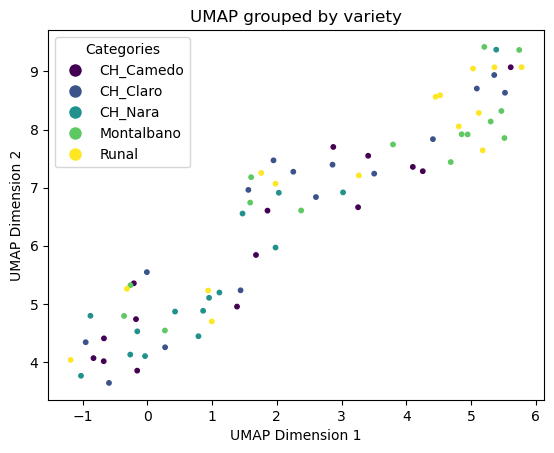

In [111]:
# Create custom legend

cmap = plt.cm.get_cmap("viridis", len(np.unique(numeric_labels)))  # change 'viridis' if desired

plt.scatter(umap_hart[:, 0], umap_hart[:, 1], c=numeric_labels,cmap=cmap,s=10)

labels = ["CH_Camedo", "CH_Claro","CH_Nara","Montalbano","Runal"]  # change to your actual category names


legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=labels[i],
                             markerfacecolor=cmap(i), markersize=10)
                  for i in range(len(labels))]

# Add legend to the plot
plt.legend(handles=legend_handles, title="Categories")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("UMAP grouped by variety")
plt.show()

In [112]:
WL_heading_Clean_Subset=WL_heading_Clean[["rflt_400","rflt_450","rflt_500","rflt_550","rflt_600","rflt_650","rflt_700","rflt_710","rflt_720","rflt_730","rflt_740","rflt_750","rflt_760","rflt_770","rflt_780","rflt_790","rflt_800","rflt_850","rflt_900","rflt_950","rflt_1000","rflt_1050","rflt_1100","rflt_1150","rflt_1200","rflt_1250","rflt_1300","rflt_1350","rflt_1450","rflt_1500","rflt_1550","rflt_1600","rflt_1650","rflt_1700","rflt_1750","rflt_1800","rflt_1975","rflt_2000"]]

In [113]:
WL_heading_Clean_Subset

,rflt_400,rflt_450,rflt_500,rflt_550,rflt_600,rflt_650,rflt_700,rflt_710,rflt_720,rflt_730,...,rflt_1450,rflt_1500,rflt_1550,rflt_1600,rflt_1650,rflt_1700,rflt_1750,rflt_1800,rflt_1975,rflt_2000
0,0.019602,0.029183,0.030899,0.062174,0.043776,0.032950,0.059242,0.105909,0.175623,0.286699,...,0.109498,0.089415,0.133343,0.171323,0.200422,0.191928,0.186926,0.192587,0.061161,0.039951
1,0.025422,0.039737,0.050062,0.093140,0.097855,0.097395,0.134834,0.169693,0.205430,0.241468,...,0.144131,0.160400,0.195788,0.215549,0.230176,0.240586,0.230724,0.212594,0.093005,0.068976
2,0.012679,0.022492,0.026409,0.067358,0.049360,0.037094,0.072774,0.124739,0.193750,0.288756,...,0.065783,0.079810,0.115556,0.152936,0.181478,0.183720,0.154747,0.138178,0.000000,0.021118
3,0.015115,0.025579,0.029239,0.064494,0.051547,0.042842,0.073408,0.116500,0.174001,0.254887,...,0.104774,0.075601,0.127406,0.163164,0.190229,0.183799,0.166491,0.168819,0.052381,0.079018
4,0.034684,0.050278,0.055869,0.106582,0.088396,0.074414,0.118177,0.181605,0.259504,0.359943,...,0.164843,0.159492,0.221789,0.268922,0.303609,0.307767,0.285569,0.311657,0.163226,0.059132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.021092,0.032428,0.035989,0.073404,0.053940,0.041885,0.074042,0.126876,0.200360,0.311026,...,0.121557,0.100969,0.142056,0.184801,0.213208,0.212122,0.191734,0.195248,0.031821,0.028877
342,0.021754,0.032536,0.036077,0.079971,0.055702,0.040913,0.077875,0.142358,0.234362,0.378024,...,0.143596,0.116429,0.167074,0.222057,0.258870,0.257224,0.231996,0.235982,0.026960,0.034377
343,0.017602,0.026245,0.028434,0.066527,0.044208,0.031481,0.063623,0.121177,0.207642,0.348521,...,0.129830,0.099435,0.144413,0.194350,0.229060,0.228029,0.200079,0.211241,0.019447,0.031127
344,0.028562,0.040912,0.045009,0.087097,0.065103,0.050467,0.087946,0.147718,0.229362,0.347977,...,0.121137,0.099774,0.142071,0.185819,0.216710,0.216324,0.194591,0.204895,0.026937,0.031824


In [114]:
pca=PCA()
pca.fit(WL_heading_Clean_Subset)

PCA()

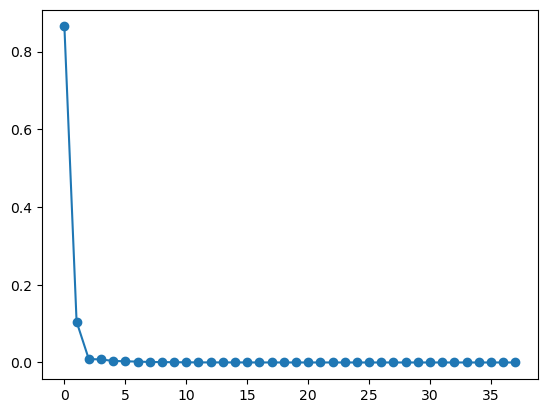

In [115]:
plt.plot(pca.explained_variance_ratio_,'-o')

Cumulative Variance Explained: [0.86454815 0.96954838 0.97846302 0.98622704 0.99029435 0.99327666
 0.9955732  0.99683515 0.99782547 0.99852942 0.9989288  0.99915522
 0.99933794 0.99947216 0.99958913 0.99968497 0.9997463  0.99979336
 0.99983309 0.99986466 0.99989308 0.9999168  0.99993472 0.99995255
 0.99996373 0.99997478 0.99998251 0.99998788 0.99999219 0.99999577
 0.99999756 0.99999854 0.99999905 0.99999939 0.99999963 0.99999979
 0.99999992 1.        ]


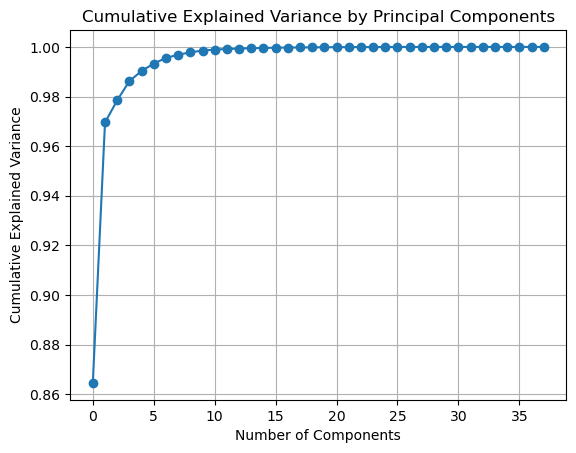

In [116]:
# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
# Calculate cumulative variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Print or visualize the cumulative variance
print("Cumulative Variance Explained:", cumulative_variance)

# Plot cumulative variance
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

In [117]:
WL_heading_Clean_Subset_columns=WL_heading_Clean_Subset.columns

In [118]:
WL_heading_Clean.shape

(346, 1819)

In [120]:
df = pd.DataFrame(pca.components_.transpose(),
                  columns = [f'V_{i+1}' for i in range(len(WL_heading_Clean_Subset_columns))],
                  index=WL_heading_Clean_Subset_columns)
df

,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,...,V_29,V_30,V_31,V_32,V_33,V_34,V_35,V_36,V_37,V_38
rflt_400,0.002937,0.035984,-0.002985,0.036265,-0.066545,-0.077143,0.047143,0.018090,0.027047,-0.030372,...,-0.314811,0.013153,0.370203,-0.570470,-0.129072,-0.081371,-0.008479,-0.002329,0.031493,-0.104290
rflt_450,0.004546,0.057737,0.008797,0.048449,-0.083053,-0.093928,0.058513,0.031172,0.033828,-0.038866,...,-0.097061,0.031067,-0.051995,0.439703,0.051023,0.038333,-0.006789,0.129759,0.006424,0.671841
rflt_500,0.007968,0.075280,0.011633,0.057094,-0.102647,-0.111227,0.070736,0.038209,0.045630,-0.059384,...,0.001776,0.045085,-0.137613,0.450820,0.112914,-0.014549,0.009058,-0.176003,-0.022726,-0.689815
rflt_550,0.004938,0.118608,0.100272,0.041700,-0.076588,-0.132578,0.133371,0.025159,0.008326,-0.070819,...,0.464148,-0.161390,-0.025780,-0.243287,-0.018979,-0.299515,-0.154666,0.048371,-0.013589,0.021636
rflt_600,0.018468,0.136195,0.055064,0.063748,-0.126743,-0.139727,0.104721,0.041003,0.076547,-0.104400,...,0.177287,-0.002736,-0.130536,-0.221454,-0.169581,0.607878,0.502824,-0.217200,-0.040285,0.072735
rflt_650,0.024707,0.141009,0.020273,0.078288,-0.151596,-0.132552,0.071822,0.055425,0.113306,-0.113475,...,-0.030904,0.120243,-0.309854,-0.225976,0.208970,-0.001037,-0.418663,0.381958,0.070668,-0.008288
rflt_700,0.022719,0.176140,0.104292,0.057160,-0.127722,-0.154214,0.136993,0.031696,0.086213,-0.128917,...,-0.135049,-0.047044,0.202034,0.128728,-0.117275,-0.538164,0.144213,-0.397969,-0.241029,0.138360
rflt_710,0.005987,0.192111,0.219704,0.011086,-0.058324,-0.144916,0.194052,-0.000885,0.026911,-0.131047,...,-0.078937,-0.051935,0.400239,0.239990,-0.105862,0.159377,-0.012803,0.266168,0.580322,-0.101635
rflt_720,-0.023342,0.190195,0.329054,-0.035184,0.022756,-0.115419,0.246817,-0.045449,-0.020716,-0.097410,...,-0.127544,-0.031272,-0.026472,0.001404,0.220101,0.261296,-0.181859,0.091009,-0.615076,-0.038052
rflt_730,-0.077068,0.152240,0.411113,-0.068129,0.120301,-0.045753,0.256434,-0.071563,-0.090646,-0.021463,...,-0.054480,0.214311,-0.510202,-0.139891,-0.029127,-0.234856,0.148439,-0.184086,0.356178,0.057263


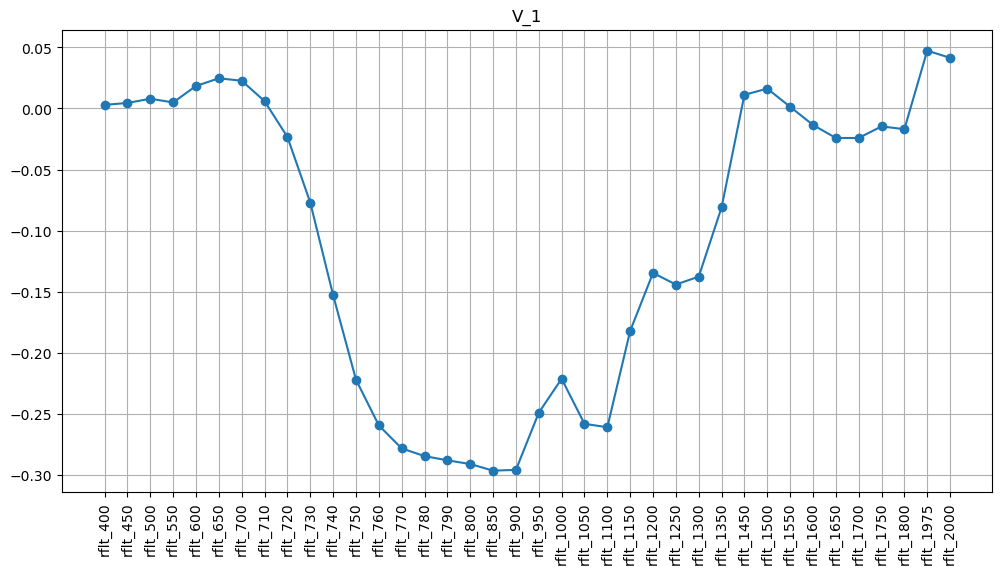

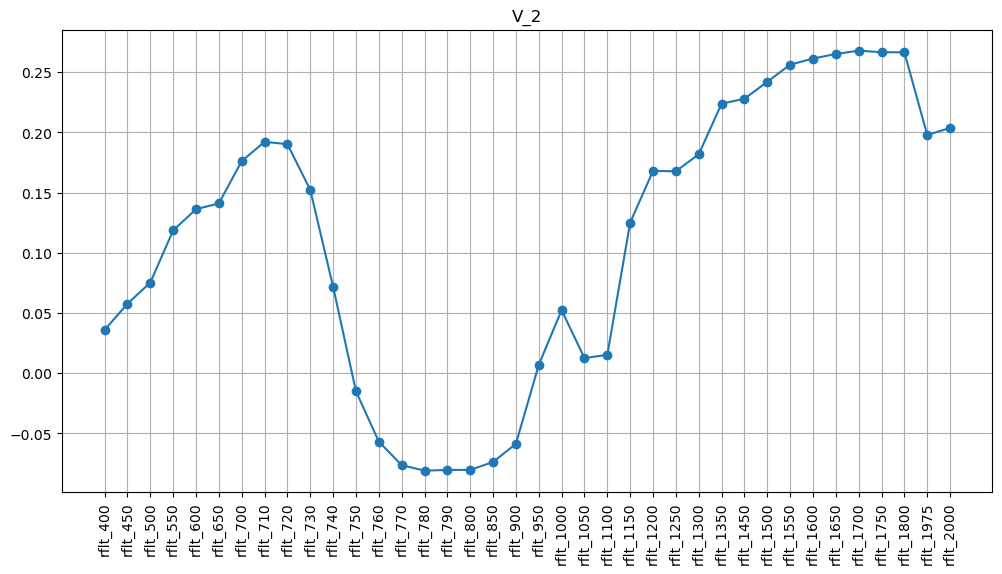

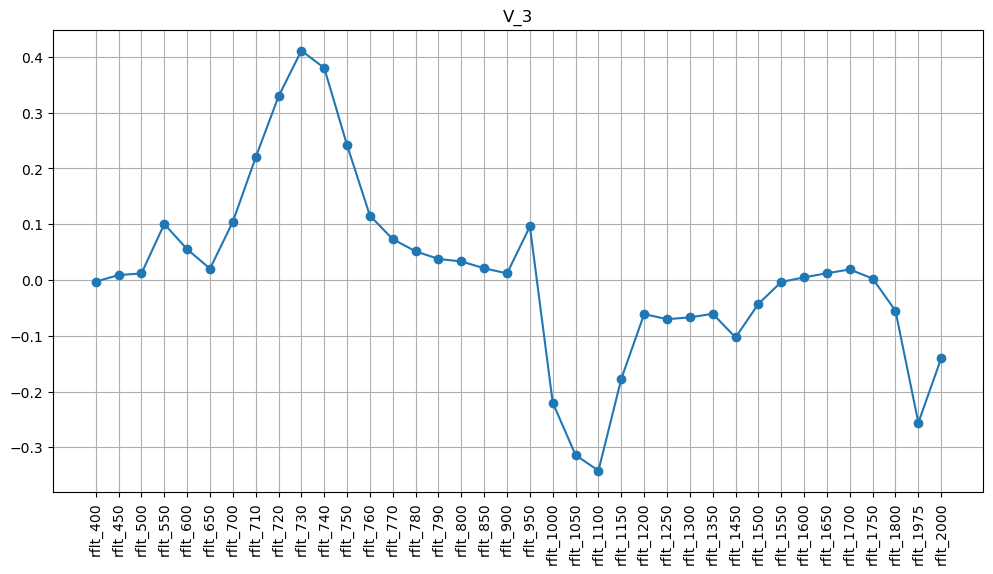

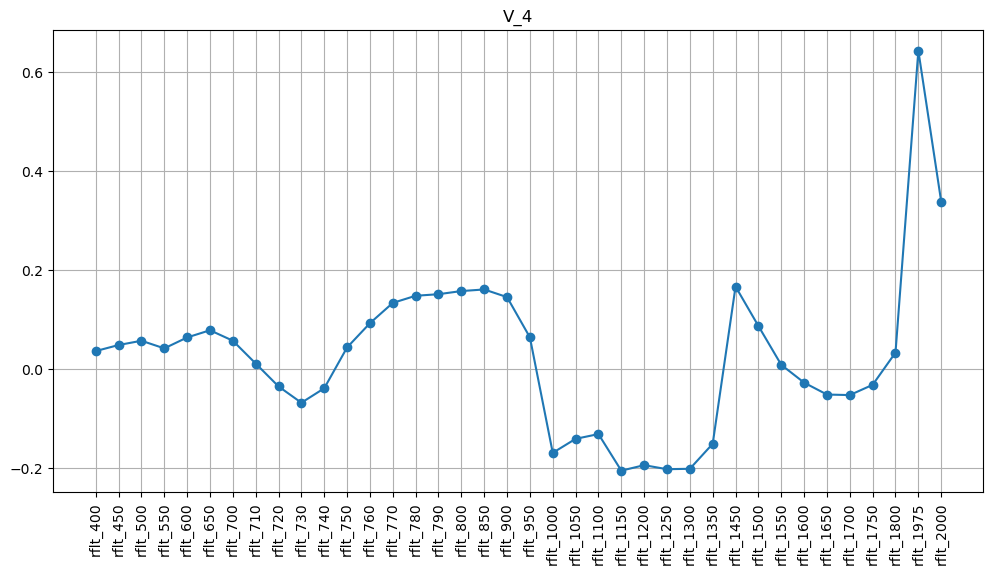

In [121]:
for vector in ['V_1','V_2','V_3','V_4']:
    plt.figure(figsize=(12, 6))
    plt.title(vector)
    plt.plot(np.arange(len(WL_heading_Clean_Subset_columns)),list(df[vector]),'-o')
    _=plt.xticks(np.arange(len(WL_heading_Clean_Subset_columns)),WL_heading_Clean_Subset_columns, rotation=90)
    plt.grid()

In [124]:
Selected_Features=["rflt_700","rflt_710","rflt_720","rflt_730","rflt_740","rflt_770","rflt_780","rflt_790","rflt_800","rflt_850","rflt_900","rflt_1050","rflt_1100","rflt_1550","rflt_1800","rflt_1975","rflt_2000"]
print(Selected_Features)
print(len(Selected_Features))

['rflt_700', 'rflt_710', 'rflt_720', 'rflt_730', 'rflt_740', 'rflt_770', 'rflt_780', 'rflt_790', 'rflt_800', 'rflt_850', 'rflt_900', 'rflt_1050', 'rflt_1100', 'rflt_1550', 'rflt_1800', 'rflt_1975', 'rflt_2000']
17


In [125]:
df_heading_withoutRowsAberrant1100

,ID,CropStage,rflt_359,rflt_360,rflt_361,rflt_362,rflt_363,rflt_364,rflt_365,rflt_366,...,MeanMSR_Re717_BHPH,MeanLAIBHHPH,MeanLAIBHPH,Date_R_NDRE717,R_NDRE717,Date_R_NDRE717_BHHPH,R_NDRE717_BHHPH,YieldGrain0PercKgM2,HIgrain_g,Histraw_g
450,1,Heading,0.018496,0.018435,0.018400,0.018405,0.018403,0.018397,0.018387,0.018440,...,1.100238,3.367222,3.136667,20210527,0.564690,20210518&27&0603,0.562016,0.708323,88.5,86.3
451,2,Heading,0.020588,0.020687,0.020785,0.020865,0.020946,0.021021,0.021073,0.021132,...,0.416664,1.685556,1.465000,20210527,0.240186,20210518&27&0603,0.257691,0.319911,72.2,123.9
452,3,Heading,0.011134,0.011124,0.011104,0.011091,0.011060,0.011027,0.011021,0.011047,...,0.919589,2.987222,3.137500,20210527,0.503334,20210518&27&0603,0.502541,0.665302,61.4,70.3
453,4,Heading,0.014384,0.014365,0.014328,0.014269,0.014220,0.014181,0.014157,0.014164,...,0.939131,3.116111,2.858333,20210527,0.526015,20210518&27&0603,0.522559,0.586376,55.6,81.0
454,5,Heading,0.031535,0.031565,0.031607,0.031671,0.031738,0.031801,0.031855,0.031862,...,0.882945,2.810556,2.635000,20210527,0.490496,20210518&27&0603,0.489624,NaN,64.3,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,71,Heading,0.019242,0.019225,0.019217,0.019220,0.019220,0.019213,0.019193,0.019167,...,1.743544,6.042778,6.188333,20220602,0.647410,20220506&0602&15,0.625584,0.779080,NaN,NaN
2546,72,Heading,0.019873,0.019854,0.019848,0.019870,0.019876,0.019877,0.019889,0.019899,...,1.628855,7.557778,7.463333,20220602,0.637141,20220506&0602&15,0.621880,0.766578,NaN,NaN
2547,73,Heading,0.017100,0.017062,0.017031,0.016999,0.016990,0.016984,0.016945,0.016906,...,1.849857,6.806111,6.851667,20220602,0.666501,20220506&0602&15,0.659692,0.806605,NaN,NaN
2548,74,Heading,0.027034,0.027032,0.027038,0.027049,0.027046,0.027034,0.027017,0.027002,...,1.374327,3.890556,3.947500,20220602,0.552042,20220506&0602&15,0.534020,0.656806,NaN,NaN
